In [6]:
import os

%load_ext autoreload
%autoreload 2

""""
Devo code for moment by moment decoding --> i.e., for each time bin, find strength of representation of
each class of a variable (e.g., shape), as opposed to decoding average accuracy across trials.

Here collecting methods and quick analyses
"""

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'"\nDevo code for moment by moment decoding --> i.e., for each time bin, find strength of representation of\neach class of a variable (e.g., shape), as opposed to decoding average accuracy across trials.\n\nHere collecting methods and quick analyses\n'

# Load a dataset

To load and plot a dataset of neural activity across population, in a PopAnal class object.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_match_chans_across_pa_each_bregion
from neuralmonkey.classes.population_mult import extract_single_pa


In [ ]:
# Method 1 - load a single DFallPA
DFallpa = load_handsaved_wrapper()


In [ ]:
# Method 1 - load a single DFallPA
DFallpa = load_handsaved_wrapper(animal="Pancho", date=230623, version="trial")


In [ ]:
# Method 2 - Combine two dfallpa
DFallpa1 = load_handsaved_wrapper(animal="Diego", date=230630, version="trial")
DFallpa2 = load_handsaved_wrapper(animal="Diego", date=230630, version="stroke")
DFallpa = pd.concat([DFallpa1, DFallpa2]).reset_index(drop=True)


In [13]:
# Method 2 - Combine two dfallpa
animal = "Diego"
date = 240619
COMBINE_AREAS = False


DFallpa1 = load_handsaved_wrapper(animal=animal, date=date, version="trial", combine_areas=COMBINE_AREAS, use_time=False)
DFallpa2 = load_handsaved_wrapper(animal=animal, date=date, version="stroke", combine_areas=COMBINE_AREAS, use_time=False)
DFallpa = pd.concat([DFallpa1, DFallpa2]).reset_index(drop=True)


In [14]:

# Prune to chans that are common across pa for each bregion (intersection of chans)|
dfpa_match_chans_across_pa_each_bregion(DFallpa)

M1_m  -- n chans final:  30
M1_l  -- n chans final:  22
PMv_l  -- n chans final:  32
PMv_m  -- n chans final:  30
PMd_p  -- n chans final:  25
PMd_a  -- n chans final:  25
dlPFC_a  -- n chans final:  32
vlPFC_p  -- n chans final:  26
vlPFC_a  -- n chans final:  21
FP_p  -- n chans final:  27
FP_a  -- n chans final:  30
SMA_p  -- n chans final:  30
SMA_a  -- n chans final:  27
preSMA_p  -- n chans final:  23
preSMA_a  -- n chans final:  29


In [15]:
SAVEDIR = f"/lemur2/lucas/analyses/recordings/main/decode_moment/PIG/{animal}-{date}"
os.makedirs(SAVEDIR, exist_ok=True)

# Preprocessing

##### Devo -- removing noisy channels

In [16]:
from neuralmonkey.classes.population_mult import dfpa_concatbregion_preprocess_clean_bad_channels
dfpa_concatbregion_preprocess_clean_bad_channels(DFallpa, PLOT=False)

Keep, for  M1_m  ... 28 / 30
Keep, for  M1_l  ... 19 / 22
Keep, for  PMv_l  ... 28 / 32
Keep, for  PMv_m  ... 29 / 30
Keep, for  PMd_p  ... 24 / 25
Keep, for  PMd_a  ... 23 / 25
Keep, for  dlPFC_a  ... 25 / 32
Keep, for  vlPFC_p  ... 23 / 26
Keep, for  vlPFC_a  ... 16 / 21
Keep, for  FP_p  ... 17 / 27
Keep, for  FP_a  ... 11 / 30
Keep, for  SMA_p  ... 26 / 30
Keep, for  SMA_a  ... 27 / 27
Keep, for  preSMA_p  ... 19 / 23
Keep, for  preSMA_a  ... 23 / 29


### FR Normalization

##### Method 1 - each PA normalize independently

In [17]:
DFallpa

,which_level,event,bregion,twind,pa,pa_x_shape
0,trial,03_samp,M1_m,"(-0.8, 1.2)",<neuralmonkey.classes.population.PopAnal objec...,"(30, 675, 200)"
1,trial,03_samp,M1_l,"(-0.8, 1.2)",<neuralmonkey.classes.population.PopAnal objec...,"(22, 675, 200)"
2,trial,03_samp,PMv_l,"(-0.8, 1.2)",<neuralmonkey.classes.population.PopAnal objec...,"(32, 675, 200)"
3,trial,03_samp,PMv_m,"(-0.8, 1.2)",<neuralmonkey.classes.population.PopAnal objec...,"(30, 675, 200)"
4,trial,03_samp,PMd_p,"(-0.8, 1.2)",<neuralmonkey.classes.population.PopAnal objec...,"(25, 675, 200)"
5,trial,03_samp,PMd_a,"(-0.8, 1.2)",<neuralmonkey.classes.population.PopAnal objec...,"(25, 675, 200)"
6,trial,03_samp,dlPFC_a,"(-0.8, 1.2)",<neuralmonkey.classes.population.PopAnal objec...,"(32, 675, 200)"
7,trial,03_samp,vlPFC_p,"(-0.8, 1.2)",<neuralmonkey.classes.population.PopAnal objec...,"(26, 675, 200)"
8,trial,03_samp,vlPFC_a,"(-0.8, 1.2)",<neuralmonkey.classes.population.PopAnal objec...,"(21, 675, 200)"
9,trial,03_samp,FP_p,"(-0.8, 1.2)",<neuralmonkey.classes.population.PopAnal objec...,"(27, 675, 200)"


In [ ]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_fr_normalization
# fr_normalization_method = "each_time_bin"
fr_normalization_method = "across_time_bins"
plot_savedir = "/tmp"
dfallpa_preprocess_fr_normalization(DFallpa, fr_normalization_method, plot_savedir)

##### Method 2 - Concat events (for each bregion) and normalize all same way


In [ ]:
from neuralmonkey.classes.population_mult import dfpa_concat_normalize_fr_split_multbregion
# fr_normalization_method = "each_time_bin"
fr_normalization_method = "across_time_bins"
dfpa_concat_normalize_fr_split_multbregion(DFallpa)


##### Method 3 - concat events (flexible version, only constrianed to have same n chans across PA) [works if have both trial and stroke!]

Running ..  M1_m
Running ..  M1_l
Running ..  PMv_l
Running ..  PMv_m
Running ..  PMd_p
Running ..  PMd_a
Running ..  dlPFC_a
Running ..  vlPFC_p
Running ..  vlPFC_a
Running ..  FP_p
Running ..  FP_a
Running ..  SMA_p
Running ..  SMA_a
Running ..  preSMA_p
Running ..  preSMA_a


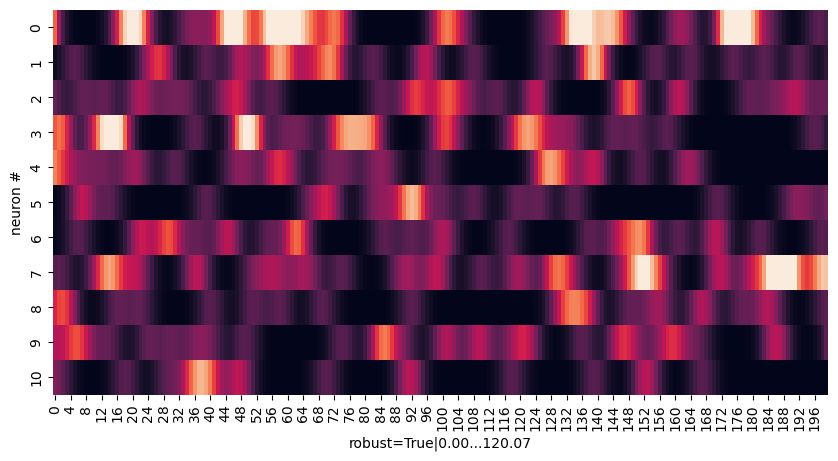

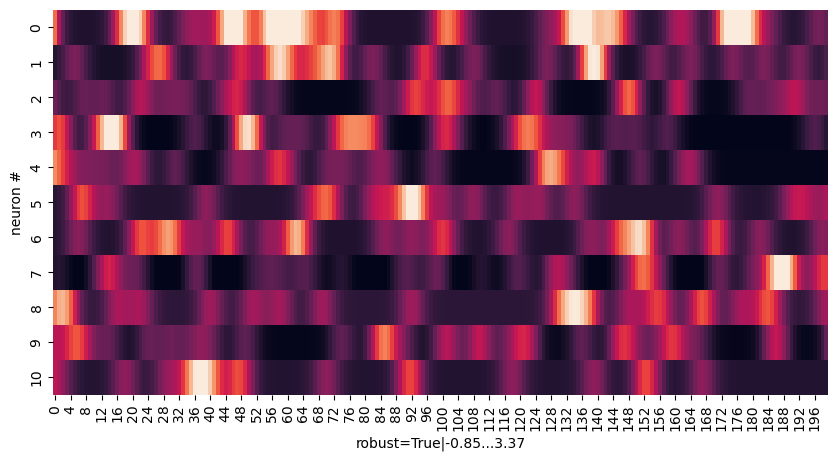

In [18]:
from neuralmonkey.classes.population_mult import dfpa_concat_normalize_fr_split_multbregion_flex
fr_mean_subtract_method = "across_time_bins"
# fr_mean_subtract_method = "each_time_bin"
PLOT=False

pa = DFallpa["pa"].values[10]
pa.plotNeurHeat(0)

dfpa_concat_normalize_fr_split_multbregion_flex(DFallpa, fr_mean_subtract_method, PLOT)

pa = DFallpa["pa"].values[10]
pa.plotNeurHeat(0)

### Run a single PCA across all events

In [ ]:
# NOTE: only works if all events are in which_level=="trials"

In [ ]:
from neuralmonkey.classes.population_mult import dfpa_concat_pca_split_multbregion
dfpa_concat_pca_split_multbregion(DFallpa, npcs_keep_force=15)

In [ ]:
DFallpa["pa"] = DFallpa["pa_pca"]

In [ ]:
ind = 17
pa = DFallpa["pa"].values[ind]
pa_pca = DFallpa["pa_pca"].values[ind]

pa.plotNeurHeat(0)
pa_pca.plotNeurHeat(0)


In [ ]:
# Do PCA and use PCs for all subsequent analyses
DFallpa

### Factorize all relevant labels FIRST here.


In [ ]:
if False: # Ingore this for now
    from neuralmonkey.analyses.decode_good import preprocess_factorize_class_labels_ints
    MAP_LABELS_TO_INT = preprocess_factorize_class_labels_ints(DFallpa)

# [Optional] Extract relevant variables


In [19]:

shape_var_suff = "shape"
# shape_var_suff = "shapesemgrp"

for i, row in DFallpa.iterrows():
    if row["which_level"] == "trial":
        PA = row["pa"]
        dflab = PA.Xlabels["trials"]

        # (1) shapes drawn (tuple of shapes)
        list_shapes_drawn = []
        list_locs_drawn = []
        for ind in range(len(dflab)):
            shapes_drawn = tuple([dflab.iloc[ind][f"seqc_{i}_{shape_var_suff}"] for i in range(6) if dflab.iloc[ind][f"seqc_{i}_{shape_var_suff}"] != "IGN"])
            list_shapes_drawn.append(shapes_drawn)

            locs_drawn = tuple([dflab.iloc[ind][f"seqc_{i}_loc"] for i in range(6) if dflab.iloc[ind][f"seqc_{i}_loc"][0] != "IGN"])
            list_locs_drawn.append(locs_drawn)

            assert len(locs_drawn)==len(shapes_drawn)

        dflab["shapes_drawn"] = list_shapes_drawn            
        dflab["locs_drawn"] = list_locs_drawn    

# Train decoder

# 1. Scalar scores - various kinds of train-test splits

### A. Pre-stroke prep period

In [ ]:
# Train: single prims, pre-stroke0 (i.e, prep activity)
# Test: 
# - post-samp (SP and PIG)
# - 

In [ ]:
DFallpa
pa = DFallpa["pa"].values[17]
pa.plotNeurHeat(20)

In [ ]:
from neuralmonkey.analyses.decode_moment import train_decoder_helper, pipeline_train_test_scalar_score


In [20]:
from neuralmonkey.scripts.analy_pig_decode_moment_syntaxTI import get_dataset_params

##### A single run here:

In [ ]:
savedir = "/tmp"

In [ ]:
pa = DFallpa["pa"].values[0]
dflab = pa.Xlabels["trials"]
dflab["task_kind"].value_counts()

In [ ]:
bregion = "M1"
train_dataset = "sp_samp"
### Train params
var_test = "seqc_0_shape"

# Train params
var_train = "seqc_0_shape"
n_min_per_var = 3
include_null_data = True

# Test params
test_dataset = "pig_samp"


event_train, twind_train, filterdict_train, _, _ = get_dataset_params(train_dataset)

### Test params
event_test, _, filterdict_test, list_twind_test, _ = get_dataset_params(test_dataset)

dfscores, _, _, _ = pipeline_train_test_scalar_score(DFallpa, bregion, var_train, event_train, twind_train, filterdict_train,
                                    var_test, event_test, list_twind_test, filterdict_test, savedir)


##### Loop below:

In [ ]:
list_bregion = DFallpa["bregion"].unique().tolist()

### Train params

# Train params
var_train = "seqc_0_shape"
n_min_per_var = 3
include_null_data = True

# Test params
var_test = "seqc_0_shape"

RES = []
for train_dataset, test_dataset in [
    ("sp_samp", "sp_samp"),
    ("sp_samp", "pig_samp"),
    ("sp_samp", "sp_prestroke"),
    ("pig_samp", "pig_samp"),
    ("pig_samp", "sp_samp"),
    ("pig_samp", "sp_prestroke"),
    ("sp_prestroke", "sp_samp"),
    ("sp_prestroke", "pig_samp"),
    ("sp_prestroke", "pig_prestroke"),
    ]:

    print(train_dataset, test_dataset)

    for bregion in list_bregion:
        # bregion = "PMd"


        event_train, twind_train, filterdict_train, _, _ = get_dataset_params(train_dataset)

        ### Test params
        event_test, _, filterdict_test, list_twind_test, _, _ = get_dataset_params(test_dataset)

        from neuralmonkey.analyses.decode_moment import pipeline_train_test_scalar_score
        savedir = f"{SAVEDIR}/pipeline_train_test_scalar_score/train={train_dataset}-test={test_dataset}-bregion={bregion}"
        os.makedirs(savedir, exist_ok=True)

        dfscores, _, _, _ = pipeline_train_test_scalar_score(DFallpa, bregion, var_train, event_train, twind_train, filterdict_train,
                                            var_test, event_test, list_twind_test, filterdict_test, savedir)
        
        RES.append({
            "dfscores":dfscores,
            "train_dataset":train_dataset,
            "test_dataset":test_dataset,
            "bregion":bregion
        })

In [ ]:
# Summarize
for res in RES:
    dfscores = res["dfscores"]
    dfscores["train_dataset"] = res["train_dataset"]
    dfscores["test_dataset"] = res["test_dataset"]
    dfscores["bregion"] = res["bregion"]

DFSCORES = pd.concat([res["dfscores"] for res in RES]).reset_index(drop=True)

from pythonlib.tools.pandastools import summarize_featurediff
from pythonlib.tools.pandastools import append_col_with_grp_index

DFSUMMARY, _, _, _, _ = summarize_featurediff(DFSCORES, "same_class", [False, True], ["score"], 
                    ["train_dataset", "test_dataset", "bregion", "decoder_class_good", "decoder_class_is_in_pa", "pa_class", "pa_class_is_in_decoder", "pa_idx", "trialcode", "twind"])

DFSUMMARY = append_col_with_grp_index(DFSUMMARY, ["train_dataset", "test_dataset"], "train_test_dataset")
a = DFSUMMARY["decoder_class_good"]==True
b = DFSUMMARY["decoder_class_is_in_pa"]==True
c = DFSUMMARY["pa_class_is_in_decoder"]==True
DFSUMMARY = DFSUMMARY[a & b & c].reset_index(drop=True)
 
from pythonlib.tools.pandastools import plot_subplots_heatmap
from pythonlib.tools.pandastools import savefig

# plot_subplots_heatmap(DFSUMMARY, "train_test_dataset", "bregion", "score-TrueminFalse", "twind", True, True)

savedir = f"{SAVEDIR}/pipeline_train_test_scalar_score/ALL_TRAIN_TEST"
os.makedirs(savedir, exist_ok=True)

from pythonlib.tools.pandastools import plot_subplots_heatmap

for share_zlim in [False, True]:
    for annotate_heatmap in [False, True]:
        fig, axes = plot_subplots_heatmap(DFSUMMARY, "bregion", "twind", "score-TrueminFalse", "train_test_dataset", 
                                          True, share_zlim=share_zlim, annotate_heatmap=annotate_heatmap)
        savefig(fig, f"{savedir}/score-TrueminFalse--share_zlim={share_zlim}--annotate_heatmap={annotate_heatmap}")
# fig, axes = plot_subplots_heatmap(DFSUMMARY, "bregion", "twind", "score-TrueminFalse", "train_test_dataset", True, True, annotate_heatmap=True)
# fig, axes = plot_subplots_heatmap(DFSUMMARY, "bregion", "twind", "score-TrueminFalse", "train_test_dataset", True, False, annotate_heatmap=False)
# fig, axes = plot_subplots_heatmap(DFSUMMARY, "bregion", "twind", "score-TrueminFalse", "train_test_dataset", True, False, annotate_heatmap=True)

# Save all results
path = f"{SAVEDIR}/pipeline_train_test_scalar_score/DFSCORES.pkl"
pd.to_pickle(DFSCORES, path)

# 2. Plotting single trials.

In [ ]:
trial = 10
# Dc1.plot_single_trial(trial, PA=PAtrain, shape_var="seqc_0_shape", tbin_dur=0.15)
print(PAtrain.Xlabels["trials"].iloc[trial][var_train])
Dc2.plot_single_trial(trial, PA=PAtrain, shape_var="seqc_0_shape", tbin_dur=0.15)


In [ ]:
trial = 12
# Dc1.plot_single_trial(trial, PA=PAtrain, shape_var="seqc_0_shape", tbin_dur=0.15)
print(PAtrain.Xlabels["trials"].iloc[trial][var_train])
Dc2.plot_single_trial(trial, PA=PAtrain, shape_var="seqc_0_shape", tbin_dur=0.15)


In [ ]:
trial = 9
# Dc1.plot_single_trial(trial, PA=PAtrain, shape_var="seqc_0_shape", tbin_dur=0.15)
print(PAtest.Xlabels["trials"].iloc[trial][var_train])
Dc2.plot_single_trial(trial, PA=PAtest, shape_var="seqc_0_shape", tbin_dur=0.15)


##### Pick a single decoder

In [ ]:
Dc = Dc2

##### Get a single scalar score (by averaging the decode across time bins)


In [ ]:
list_twind = [
    [-0.95, -0.1],
    [0.1, 0.95],
]

scores = Dc.scalar_score_twinds_trials(list_twind, PA=PAtrain)

##### Average the decode over trials, to return a single row per trial class

In [ ]:
# Returns array: (ntrial classes, n decode clasess, ntwinds)

In [ ]:
var_decode = "seqc_0_shape"
# var_decode = "shape"
vars_trial = [var_decode]

Dc.scalar_score_twinds_trialgroupings(vars_trial, list_twind, PA=PAtrain, PLOT=True)

### Test on another dataset

In [ ]:
DFallpa

### Preprocess - Get PCs, for plotting


In [ ]:

list_papca = []
for i, row in DFallpa.iterrows():
    twind = row["twind"]
    pa = row["pa"]
    print(row["event"], row["bregion"])
    X, PAfinal, PAslice, pca, X_before_dimred = pa.dataextract_state_space_decode_flex(twind_overall=twind,
                                            tbin_dur=0.1, tbin_slide=0.02,
                                            reshape_method = "chans_x_trials_x_times",
                                            pca_reduce=True, npcs_keep_force=10)
    assert pa.X.shape[1] == PAfinal.X.shape[1]
    list_papca.append(PAfinal)
DFallpa["pa_pca"] = list_papca

### Specific for PIG --> for each trial, plot each trial event, and also each stroke

Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*240619*/**
Found this many paths:
1
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/240619/Diego-240619-111839
session:  0
Beh Sessions that exist on this date:  {240619: [(1, 'shapeseqdiego2c')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['shapeseqdiego2c']
Loading these beh sessions: [1]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*240619*/**
Found this many paths:
1
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/240619/Diego-240619-111839
{'filename_components_hyphened': ['Diego', '240619', '111839'], 'basedirs': ['/home/lucas/mnt/Freiwald/ltian/recordings/Diego', '/home/lucas/mnt/Freiwald/ltian/recordings/Diego/240619'], 'basedirs_filenames': ['240619', 'Diego-240619-111839'], 'filename_final_ext': 'Diego-240619-111839', 'filename_final_noext': 'Diego-240619-111839'}
FOund thi

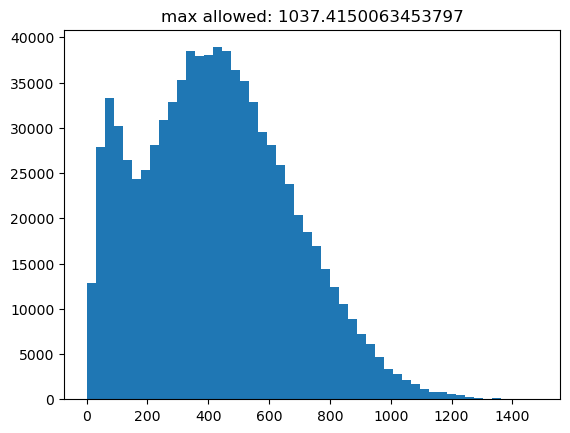

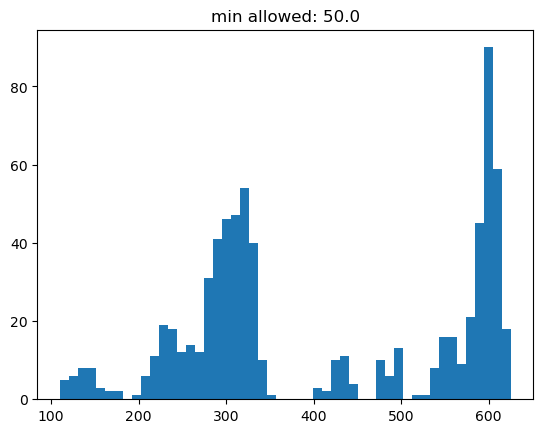

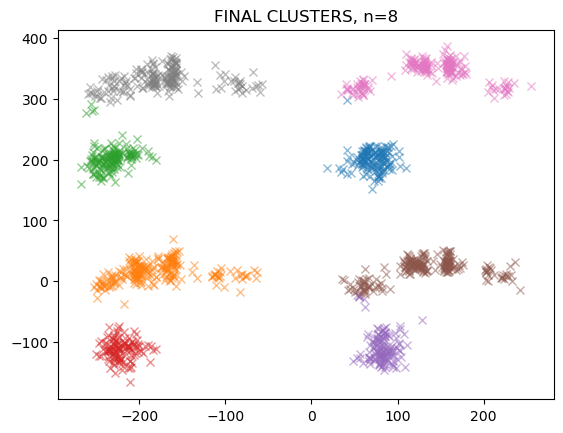

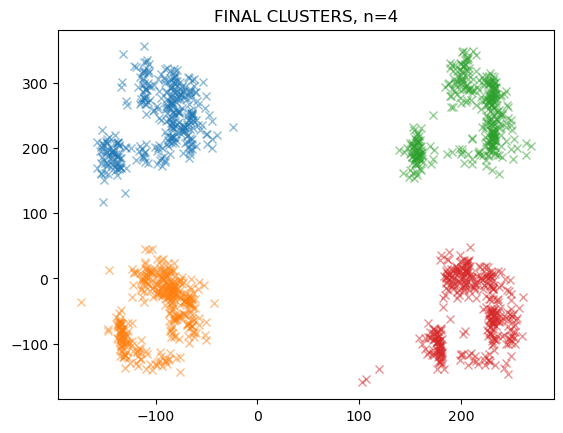

In [21]:
# Overlay other trial features:
# - eye tracking
# - stroke timing

# (1) Load session object
from neuralmonkey.classes.session import load_mult_session_helper

# if False:
#     DATE = 230630
# else:
#     DATE = 240619
# animal = "Diego"
# spikes_version = "tdt"
spikes_version = "kilosort_if_exists"
MS = load_mult_session_helper(date, animal, MINIMAL_LOADING=True, spikes_version=spikes_version) 


# 3. PLOTS of each trial

In [ ]:
SAVEDIR = f"/lemur2/lucas/analyses/recordings/main/decode_moment/PIG/{animal}-{date}"
twind = (-1, 1.6)


In [ ]:
import random
if False:
    # Hacky, mainly plot ambiguous PIG cases, plus some random others.
    import random

    nrand = 50
    pa = extract_single_pa(DFallpa, bregion, twind, which_level="trial", event="03_samp")
    dflab = pa.Xlabels["trials"]


    trialcodes_ambiguous = dflab[dflab["taskconfig_loc"] == ((-1, 0), (-1, 1), (1, 1))]["trialcode"].tolist()
    trialcodes_others = [tc for tc in random.sample(dflab["trialcode"].unique().tolist(), nrand) if tc not in trialcodes_ambiguous]        
    TRIALCODES_PLOT = sorted(trialcodes_ambiguous + trialcodes_others)
elif True:
    # Pick random trials
    nrand = 50
    bregion = "PMv"
    pa = extract_single_pa(DFallpa, bregion, twind, which_level="trial", event="03_samp")
    dflab = pa.Xlabels["trials"]

    TRIALCODES_PLOT = sorted([tc for tc in random.sample(dflab["trialcode"].unique().tolist(), nrand)])
else:
    TRIALCODES_PLOT = None

print("n = ", len(TRIALCODES_PLOT))
print(TRIALCODES_PLOT)

In [ ]:
Dd = D.copy()
Dd.preprocessGood(params=["remove_baseline"])

In [ ]:
# Plot PCs using heatmap (PC vs. time)
from pythonlib.tools.snstools import heatmap_mat
heatmap_mat

##### IN PROGRESS -- plotting PCs using heatmap

In [ ]:
# Sample heatmap data and coordinates
X = np.array([[1, 1, 2], [2, 3, 4], [3, 5, 6]])
x_coords = np.array([2, 4, 6])
y_coords = np.array([3, 6, 9])

# Create a meshgrid for the heatmap
X_grid, Y_grid = np.meshgrid(x_coords, y_coords)

fig, ax = plt.subplots()

# Plot the heatmap using pcolormesh
heatmap = ax.pcolormesh(X_grid, Y_grid, X, shading='auto', alpha=0.1, cmap='viridis')

# Add color bar for the heatmap
plt.colorbar(heatmap, ax=ax)

# Overlay the scatterplot
ax.scatter(x=[5], y=[5], s=100, color='red')

# Set the limits to match the heatmap and scatterplot
ax.set_xlim(min(x_coords), max(x_coords))
ax.set_ylim(min(y_coords), max(y_coords))

plt.show()

In [ ]:

fig, axes = plt.subplots(2,1, sharex=True)

ax = axes.flatten()[0]
zlims = [-3, 3]
xpca = pa_pca.X[dims, trial, :].squeeze()
# heatmap_mat(xpca, ax, False, zlims, diverge=True);
# set xticks.

# c = np.array(df.columns)
# x = np.concatenate((c,[c[-1]+np.diff(c)[-1]]))-np.diff(c)[-1]/2.
# r = np.array(df.index)
# y = np.concatenate((r,[r[-1]+np.diff(r)[-1]]))-np.diff(r)[-1]/2.


# X,Y = np.meshgrid(x,y)
x = np.linspace(0, 1, xpca.shape[0])
y = np.linspace(0, 1, xpca.shape[1])
xv, yv = np.meshgrid(x, y)
pc = ax.pcolormesh(xv, yv, xpca, alpha=0.5, cmap="magma", shading='nearest')
fig.colorbar(pc)

# ax.set_xticks(np.arange(len(pa_pca.Times)), pa_pca.Times);
ax.set_xticks([0, len(pa_pca.Times)], [pa_pca.Times[0], pa_pca.Times[-1]]);

ax = axes.flatten()[1]
ax.set_title("PCA (within events)")
for d in dims:
    x = pa_pca.X[d, trial, :]
    t = pa_pca.Times
    t = t+event_time
    col = map_pc_to_col[d]
    ax.plot(t, x, color=col, label=f"dim {d}")
if _i==0:
    ax.legend()


##### Make time decoding plots

In [ ]:
TBIN_DUR = 0.15
TBIN_SLIDE = 0.01
color_by="shape_order_global"
# color_by="stroke_index_seqc"

###### Methods to map from shape to index (e.g., for consistent ordering across trials and plots)
shape_sequence = Dd.grammarparses_rules_shape_AnBmCk_get_shape_order()

if color_by=="stroke_index_seqc":
    # A single mapping from storke index to color
    # Get color for seqc num
    for i in range(6):
        if all(dflab[f"seqc_{i}_shape"] =="IGN"):
            break
    max_stroke_num = i-1

    MAP_INDEX_TO_COL, _, _ = color_make_map_discrete_labels(range(max_stroke_num+1))

    # add one for not drawn
    MAP_INDEX_TO_COL["NOT_DRAWN"] = np.array([0.8, 0.8, 0.8, 0.8])

elif color_by=="shape_order_global":
    # Two ways to map shape to stroke index
    # 1. global (rule)

    MAP_INDEX_TO_COL, _, _ = color_make_map_discrete_labels(range(len(shape_sequence)))
    MAP_SHAPE_TO_INDEX = {sh:i for i, sh in enumerate(shape_sequence)}
else:
    assert False

#####
LIST_TRAIN_DATA = ["samp", "strokes"]
LIST_TRAIN_DATA = ["samp"]

####
for bregion in ["PMv", "preSMA", "vlPFC", "PMd", "SMA", "M1", "dlPFC", "FP"]:

    for TRAIN_DATA in LIST_TRAIN_DATA: 

        savedir = f"{SAVEDIR}/trial_plots-{bregion}-TRAIN_DATA={TRAIN_DATA}-tbin_dur={TBIN_DUR}-color_shape_by={color_by}"
        os.makedirs(savedir, exist_ok=True)
        
        # Generate decoder
        if TRAIN_DATA == "strokes":
            _, _, Dc = train_decoder_strokes(bregion, PLOT=False)
        elif TRAIN_DATA == "samp":
            _, _, Dc = train_decoder_singleprims(bregion, PLOT=False)
        else:
            assert False
        from pythonlib.tools.plottools import color_make_map_discrete_labels
        import numpy as np

        # Prep variables.
        pa = extract_single_pa(DFallpa, bregion, twind, which_level="trial", event="03_samp")
        dflab = pa.Xlabels["trials"]

        dims = [0,1,2, 3]
        map_pc_to_col = color_make_map_discrete_labels(dims)[0]
        # Get the order of shapes drawn, and map to colors
        

        # PRep some stuff
        map_shape_to_color_orig, _, _ = color_make_map_discrete_labels(Dc.LabelsUnique)

        pa = extract_single_pa(DFallpa, bregion, twind, "trial", "03_samp")
        if TRIALCODES_PLOT is None:
            list_trialcode = sorted(pa.Xlabels["trials"]["trialcode"].unique())
        else:
            list_trialcode = TRIALCODES_PLOT

        for trialcode in list_trialcode:

            # shapes_to_plot = [sh for sh in Dc.LabelsUnique if sh!="null"]
            shapes_to_plot = shape_sequence

            fig, axes = plt.subplots(4,1, figsize=(16,12), sharex=True, sharey=False)

            # GEt SN
            sn, trial_sn, _ = MS.index_convert_trial_trialcode_flex(trialcode)

            # Task features
            D = sn.Datasetbeh
            task_kind = D.Dat[D.Dat["trialcode"] == trialcode]["task_kind"].values[0]
            

            ########### Trials
            which_level = "trial"
            time_trial_onset = 0.
            for _i, event in enumerate(["03_samp", "05_first_raise"]):
                pa = extract_single_pa(DFallpa, bregion, twind, which_level, event)
                pa_pca = extract_single_pa(DFallpa, bregion, twind, which_level, event, pa_field="pa_pca")

                # get the trial for this trialcode
                dflab = pa.Xlabels["trials"]
                tmp = dflab[dflab["trialcode"] == trialcode].index.tolist()
                assert len(tmp)==1
                trial = tmp[0]



                shapes_drawn = dflab.iloc[trial]["shapes_drawn"]
                taskconfig_shp = dflab.iloc[trial]["taskconfig_shp"]
                event_time = dflab.iloc[trial]["event_time"]
                if event=="03_samp":
                    time_trial_onset = event_time+twind[0]


                # Get for this trial
                assert False, "add the params here"
                map_shape_to_col_this = Dc._plot_single_trial_helper_color_by(color_by, params)
                # if color_by=="stroke_index_seqc":
                #     map_shape_to_col_this = {}
                #     for i, sh in enumerate(shapes_drawn):
                #         col = MAP_INDEX_TO_COL[i]
                #         map_shape_to_col_this[sh] = col
                #     for sh in shapes_to_plot:
                #         if sh not in map_shape_to_col_this:
                #             # Then give it a low-alpah version of its color
                #             # map_shape_to_col_this[sh] = MAP_INDEX_TO_COL["NOT_DRAWN"]
                #             col = map_shape_to_color_orig[sh].copy()
                #             col[3] = 0.25
                #             map_shape_to_col_this[sh] = col
                # elif color_by=="shape_order_global":
                #     map_shape_to_col_this = {}
                #     for sh in shapes_drawn:
                #         if sh not in shape_sequence:
                #             map_shape_to_col_this[sh] = np.array([0.8, 0.8, 0.8, 0.8])
                #         else:
                #             idx = MAP_SHAPE_TO_INDEX[sh]
                #             col = MAP_INDEX_TO_COL[idx]
                #             map_shape_to_col_this[sh] = col
                #     # - get the shapes that are not drawn
                #     for sh in shapes_to_plot:
                #         if sh not in map_shape_to_col_this:
                #             # Then give it a low-alpah version of its color
                #             idx = MAP_SHAPE_TO_INDEX[sh]
                #             col = MAP_INDEX_TO_COL[idx].copy()
                #             col[3] = 0.35
                #             map_shape_to_col_this[sh] = col
                # else:
                #     assert False


                ax = axes.flatten()[0]
                if _i>0:
                    plot_legend=False
                    title = None
                else:
                    plot_legend = True
                    title = f"shapes_drawn={shapes_drawn} | taskconfig_shp={taskconfig_shp}"
                Dc.plot_single_trial(trial, pa, title=title, shift_time_dur=event_time, ax=ax,
                                                            map_lab_to_col=map_shape_to_col_this, labels_to_plot=shapes_to_plot,
                                                            plot_legend=plot_legend, tbin_dur=TBIN_DUR, 
                                                            tbin_slide=TBIN_SLIDE) 
                legend_add_manual(ax, labels=shape_sequence, colors=[map_shape_to_col_this[sh] for sh in shape_sequence])


                # 3 - Plot neural data
                ax = axes.flatten()[1]
                ax.set_title("Mean FR across all chans")
                pathis = pa.slice_by_dim_indices_wrapper("trials", [trial])
                pathis.plotwrapper_smoothed_fr(ax=ax, plot_indiv=False, plot_summary=True, time_shift_dur=event_time)



                # 4 - Plot PCA
                ax = axes.flatten()[2]
                ax.set_title("PCA (within events)")
                for d in dims:
                    x = pa_pca.X[d, trial, :]
                    t = pa_pca.Times
                    t = t+event_time
                    col = map_pc_to_col[d]
                    ax.plot(t, x, color=col, label=f"dim {d}")
                if _i==0:
                    from pythonlib.tools.plottools import legend_add_manual
                    # legend_add_manual(ax, labels=map_shape_to_col_this.keys(), colors=map_shape_to_col_this.values())
                    ax.legend()

            ########### Strokes 
            which_level = "stroke"
            event="00_stroke"
            pa = extract_single_pa(DFallpa, bregion, twind, which_level, event)
            pa_pca = extract_single_pa(DFallpa, bregion, twind, which_level, event, pa_field="pa_pca")

            # get the trial for this trialcode
            dflab = pa.Xlabels["trials"]
            inds = dflab[dflab["trialcode"] == trialcode].index.tolist()

            ct=0
            for trial in inds:
                stroke_index = dflab.iloc[trial]["stroke_index"]
                shape = dflab.iloc[trial]["shape"]
                event_time = dflab.iloc[trial]["event_time"]

                ax = axes.flatten()[0]
                title = None
                Dc.plot_single_trial(trial, pa, title=title, shift_time_dur=event_time, ax=ax, plot_legend=False,
                                map_lab_to_col=map_shape_to_col_this, labels_to_plot=shapes_to_plot, tbin_dur=TBIN_DUR, 
                                                            tbin_slide=TBIN_SLIDE)

                # 3 - Plot neural data
                ax = axes.flatten()[1]
                ax.set_title("Mean FR across all chans")
                pathis = pa.slice_by_dim_indices_wrapper("trials", [trial])
                pathis.plotwrapper_smoothed_fr(ax=ax, plot_indiv=False, plot_summary=True, time_shift_dur=event_time)

                # 4 - Plot PCA
                ax = axes.flatten()[2]
                dims = [0,1,2, 3]
                for d in dims:
                    x = pa_pca.X[d, trial, :]
                    t = pa_pca.Times
                    t = t+event_time
                    col = map_pc_to_col[d]
                    ax.plot(t, x, color=col, label=f"dim {d}")
                # ax.legend()

                time_trial_offset = event_time+twind[1]

                ct+=1


            ###### FIXATIONS
            # 1 - overlay closest shape
            for ax in axes.flatten()[:3]:
                ylim = ax.get_ylim()
                map_shape_to_col_this["FAR_FROM_ALL_SHAPES"] = np.array([0.8, 0.8, 0.8, 1.])
                dffix, map_shape_to_y, map_shape_to_col = sn.beh_eye_fixation_task_shape_overlay_plot(trial_sn, ax, 
                                                                                                map_shape_to_col=map_shape_to_col_this, 
                                                                                                yplot=ylim[0]-0.1, 
                                                                                                plot_vlines=True, vlines_alpha=0.4)
                # As sanity check, also save the fixations.
                dffix.to_csv(f"{savedir}/{trialcode}-{task_kind}-fixations.csv")

            # 2 - plot raw traces
            ax = axes.flatten()[3]
            sn.beh_plot_eye_raw_overlay_good(trial_sn, ax)
            if True:
                for t in dffix["time_global"]:
                    ax.axvline(t, color="k", alpha=0.5)

            # Window
            for ax in axes.flatten():
                ax.set_xlim([time_trial_onset, time_trial_offset])
                
            # Overlay events
            sn, trial_sn, _ = MS.index_convert_trial_trialcode_flex(trialcode)
            for ax in axes.flatten()[:4]:
                sn.plotmod_overlay_trial_events(ax, trial_sn, alpha=0.1, xmin=time_trial_onset, xmax=time_trial_offset)

            # Plot 0 lines
            for ax in axes.flatten()[1:3]:
                ax.axhline(0, color="k", alpha=0.2)
            

            ###### Plot drawing
            fig_draw, axes = plt.subplots(1, 2, figsize=(6,3), sharex=True, sharey=True)

            ax = axes.flatten()[0]
            sn.plot_taskimage(ax, trial_sn)

            ax = axes.flatten()[1]
            sn.plot_final_drawing(ax, trial_sn, strokes_only=True)


            ## SAVE
            from pythonlib.tools.plottools import savefig
            savefig(fig, f"{savedir}/{trialcode}-{task_kind}-decode.pdf")
            savefig(fig_draw, f"{savedir}/{trialcode}-{task_kind}-draw.pdf")

            plt.close("all")



### [PREPROCESS] If needed, extract eye tracking data first (clusterfix)

In [ ]:
for sn in MS.SessionsList:
    sn.extract_and_save_clusterfix_results()

# 4. Cross-correlation of activations --> sequential?

In [ ]:
def _crosscorr_compute(probs_mat, i, j, PLOT=False):
    # get cross-corr
    from scipy import signal

    x1 = probs_mat[:, i]
    x2 = probs_mat[:, j]

    x1 = x1 - np.mean(x1)
    x2 = x2 - np.mean(x1)

    corr = signal.correlate(x1, x2)
    lags = signal.correlation_lags(len(x1), len(x2))
    # corr /= np.max(corr)

    # Normalize the raw correlation to obtain the correlation coefficients
    if False:
        norm_x = np.linalg.norm(x1)
        norm_y = np.linalg.norm(x2)
        norm_factor = norm_x * norm_y
        corr_coeff = corr / norm_factor

    # sig1 = np.std(x1)
    # sig2 = np.std(x2)
    # corrcoeff = corr/(sig1*sig2)

    if PLOT:
        fig, axes = plt.subplots(4, 1, sharex=False)

        ax = axes.flatten()[0]
        ax.plot(x1)

        ax = axes.flatten()[1]
        ax.plot(x2)

        ax = axes.flatten()[2]
        ax.plot(lags, corr)
        ax.set_xlabel(["1 leads -- 2 leads"])

        if False:
            ax = axes.flatten()[3]
            # ax.plot(lags, corr)
            ax.plot(lags, corr_coeff, label="corr_coeff")
            ax.set_xlabel(["1 leads -- 2 leads"])

    return corr, lags


In [ ]:
_crosscorr_compute(probs_mat, 0, 1, PLOT=True)

In [ ]:
probs_mat.shape

In [ ]:
Dc.LabelsUnique


In [ ]:
Dc.LabelsUnique

In [ ]:
shape_sequence

In [ ]:
# Plot pairwise cross-corrs

def _crosscorr_compute_allpairs(probs_mat):
    res = {}
    n = probs_mat.shape[1]
    for i in range(n):
        for j in range(n):
            if j>=i:
                corr, lags = _crosscorr_compute(probs_mat, i, j)
                res[(i, j)] = corr
    return res, lags

In [ ]:
### Prep data
bregion = "vlPFC"
twind_pa = (-1, 1.6)
twind_analy = (-1, 1.6)
event_analy = "03_samp"
tbin_dur = 0.15
tbin_slide= 0.01

# Decoder
TRAIN_DATA = "samp"
if TRAIN_DATA == "strokes":
    _, _, Dc = train_decoder_strokes(bregion, PLOT=False)
elif TRAIN_DATA == "samp":
    _, _, Dc = train_decoder_singleprims(bregion, PLOT=False)
else:
    assert False

# Test data
pa = extract_single_pa(DFallpa, bregion, twind_pa, which_level="trial", event=event_analy)
dflab = pa.Xlabels["trials"]


In [ ]:
trials = range(200, 650)

In [ ]:

assert False, "use timeseries_score_wrapper()"

list_probs_mat = []
# list_res = []
labels_in_order=shape_sequence
for ind in trials:
    print(ind)
    # Collect probs mat across all trials
    probs_mat, times, labels = Dc.timeseries_score_single(ind, PA=pa, twind=twind_analy, labels_in_order=labels_in_order,
                                                tbin_dur=tbin_dur, tbin_slide=tbin_slide)
    
    # Center probs, because this is concatting across trials, this reduces effect of trial.

    probs_mat = probs_mat - np.mean(probs_mat, axis=1, keepdims=True)
    list_probs_mat.append(probs_mat)
    
    # res, lags = _crosscorr_compute_allpairs(probs_mat)
    # # list_res.append(res)

# Concatenate all probs mats
probs_mat = np.concatenate(list_probs_mat, axis=0)


In [ ]:
if False: # In progress -- first compute corrs, then average them
    # Average all the corrs
    assert len(set([tuple(res.keys()) for res in list_res]))==1, "cant run the below.."

    np.stack(list(res.values()))



In [ ]:
# and then compute a single res
res, lags = _crosscorr_compute_allpairs(probs_mat)
    # convert lags to times
lags_sec = lags * tbin_slide


In [ ]:
# Clean up by taking only reasonable lag windows

twind_lag = [-1, 1]

# Keep only subset of lags
inds = (lags_sec>twind_lag[0]) & (lags_sec<twind_lag[1])

lags_sec = lags_sec[inds]
res = {k:corr[inds] for k, corr in res.items()}
# corr[inds]

In [ ]:

n = len(shape_sequence)
SIZE = 2
fig, axes = plt.subplots(n, n, figsize=(n*SIZE*1.5, n*SIZE), sharex=True, sharey=True)
shapes = shape_sequence
for i, sh1 in enumerate(shapes):
    for j, sh2 in enumerate(shapes):
        if j>=i:
            # Plot
            ax = axes[i][j]
            corr = res[(i, j)]
            # ax.plot(lags, corr)
            # ax.bar(lags, corr)
            ax.fill_between(lags_sec, 0, corr)
            ax.axvline(0, color="k", alpha=0.5)
            ax.axhline(0, color="k", alpha=0.5)
            ax.set_xlabel([f"{i} leads -- {j} leads"])
            # ax.set_title([f"{i} vs {j}"])
            # ax.set_ylim([-0.1, 0.1])
            ax.set_ylim([-250, 200])
        


In [ ]:
n = len(shape_sequence)
SIZE = 2
fig, axes = plt.subplots(n, n, figsize=(n*SIZE*1.5, n*SIZE), sharex=True, sharey=True)
shapes = shape_sequence
for i, sh1 in enumerate(shapes):
    for j, sh2 in enumerate(shapes):
        if j>=i:
            # Plot
            ax = axes[i][j]
            corr = res[(i, j)]
            # ax.plot(lags, corr)
            # ax.bar(lags, corr)
            ax.fill_between(lags_sec, 0, corr)
            ax.axvline(0, color="k", alpha=0.5)
            ax.axhline(0, color="k", alpha=0.5)
            ax.set_xlabel([f"{i} leads -- {j} leads"])
            # ax.set_title([f"{i} vs {j}"])
            # ax.set_ylim([-0.1, 0.1])
            ax.set_ylim([-250, 200])
        


##### old plots, scores, split by whether shape was dreawn

In [ ]:
# Summarize across trial kinds
# pa = PAtrain
# pa = PAchar
pa = PAtest
height = 25
zmax = 0.5
score_ver = "max"

# For each trial, get score
list_twind = [(0.1, 0.8)]
scores, fig, axes = Dc.scalar_score_twinds_trials(list_twind, PA=pa, tbin_dur=tbin_dur, return_fig=True, height=height, zmax=zmax,
                                                  score_ver=score_ver)

# label each trial by which shapes were drawn.
dflab = pa.Xlabels["trials"]
ax = axes.flatten()[0]
nrows = len(dflab)
mask_drawn = np.zeros(scores.shape).astype(bool)
for ind in range(len(dflab)):
    shapes_drawn = dflab.iloc[ind]["shapes_drawn"]

    # convert drawn shapes to indices
    xinds_to_mark = [Dc.MapLabelToIdx[sh] if sh in Dc.MapLabelToIdx else -1 for sh in shapes_drawn]

    # Save which ones were drawn in a mask
    mask_drawn[ind, xinds_to_mark] = True

    xinds_to_mark = [Dc.MapLabelToIdx[sh] if sh in Dc.MapLabelToIdx else -1 for sh in shapes_drawn]
    # y = nrows - ind*np.ones(len(xinds_to_mark))
    xinds_to_mark = [x+0.5 for x in xinds_to_mark]
    y = ind*np.ones(len(xinds_to_mark))+0.5
    ax.plot(xinds_to_mark, y, "xg", alpha=1)

ax = axes.flatten()[1]
ax.imshow(mask_drawn)


# Throw out decoder labels to ignore in this score (e.g,, presamp)
labels_keep = [lab for lab in Dc.MapLabelToIdx.keys() if not lab=="presamp"]
cols_keep = [Dc.MapLabelToIdx[lab] for lab in labels_keep]

scores_clean = scores[:, cols_keep, :]
mask_drawn_clean = mask_drawn[:, cols_keep, :]
print(np.mean(scores_clean[mask_drawn_clean]))
print(np.mean(scores_clean[~mask_drawn_clean]))

fig, ax = plt.subplots()

dolog = False
bins = np.linspace(0, 1, 25)
ax.hist(scores_clean[mask_drawn_clean], bins=bins, log=dolog, histtype="step", density=True);
ax.hist(scores_clean[~mask_drawn_clean], bins=bins, log=dolog, histtype="step", density=True);



##### Train and score decoder

In [ ]:
### Get scores for each trial, across time windows, 
bregion = "dlPFC"
twind = (-1, 1.6)
var_train = "seqc_0_shape"
list_twind = [(0.1, 1.0)]

####################################
# (1) Train decoder
PAtrain, Dc1, Dc2 = train_decoder_singleprims(bregion, var_train=var_train, PLOT=True)
# - evaluate on trained trials
Dc1.scalar_score_twinds_trialgroupings([var_train], list_twind, PA=PAtrain, PLOT=True)
Dc2.scalar_score_twinds_trialgroupings([var_train], list_twind, PA=PAtrain, PLOT=True)
Dc = Dc2


In [ ]:

# (2) Test decoder (collect scores)
tbin_dur = 0.15
return_fig = False
# score_ver = "mean"
score_ver = "mean"

if True:
    # Trials, during samp
    list_twind = [(0.1, 1.6)]
    which_level = "trial"
    event = "03_samp"
    pa = extract_single_pa(DFallpa, bregion, twind, which_level, event)
    scores = Dc.scalar_score_twinds_trials(list_twind, PA=pa, tbin_dur=tbin_dur, return_fig=return_fig, score_ver=score_ver)
    dflab = pa.Xlabels["trials"]
elif False:
    # Trials, pre- and during-first stroke
    which_level = "trial"
    event = "06_on_strokeidx_0"
    list_twind = [(-0.6, 0.)]
    pa = extract_single_pa(DFallpa, bregion, twind, which_level, event)
    scores = Dc.scalar_score_twinds_trials(list_twind, PA=pa, tbin_dur=tbin_dur, return_fig=return_fig, score_ver=score_ver)
    dflab = pa.Xlabels["trials"]
elif False:
    # Strokes, gap preceding
    list_twind = [(-1., 0.)]
    which_level = "stroke"
    event = "00_stroke"
    pa = extract_single_pa(DFallpa, bregion, twind, which_level, event)
    scores = Dc.scalar_score_twinds_trials(list_twind, PA=pa, tbin_dur=tbin_dur, return_fig=return_fig, score_ver=score_ver)
    dflab = pa.Xlabels["trials"]

    # Hacky, update dflab so that it has the trial data too. Makes a copy of dflab, appending columns from trialcode.
    PAtrial.Xlabels["trials"]
    from pythonlib.tools.pandastools import slice_by_row_label, merge_subset_indices_prioritizing_second
    list_tc = dflab["trialcode"].tolist()
    _dflab_trial_toappend = slice_by_row_label(PAtrial.Xlabels["trials"], "trialcode", list_tc)
    dflab = merge_subset_indices_prioritizing_second(dflab, _dflab_trial_toappend, "trialcode")    
else:
    assert False

In [ ]:
shape_sequence

In [ ]:
Dc.LabelsUnique

# 5. Summary score -- split by shape drawn, and syntax concrete each trial (e..g, TI)

In [25]:
from neuralmonkey.scripts.analy_pig_decode_moment_syntaxTI import get_dataset_params, prepare_beh_dataset, _syntax_concrete_string_to_indices

##### First, prep the behavioral variables

Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*240619*/**
Found this many paths:
1
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/240619/Diego-240619-111839
session:  0
Beh Sessions that exist on this date:  {240619: [(1, 'shapeseqdiego2c')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['shapeseqdiego2c']
Loading these beh sessions: [1]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*240619*/**
Found this many paths:
1
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/240619/Diego-240619-111839
{'filename_components_hyphened': ['Diego', '240619', '111839'], 'basedirs': ['/home/lucas/mnt/Freiwald/ltian/recordings/Diego', '/home/lucas/mnt/Freiwald/ltian/recordings/Diego/240619'], 'basedirs_filenames': ['240619', 'Diego-240619-111839'], 'filename_final_ext': 'Diego-240619-111839', 'filename_final_noext': 'Diego-240619-111839'}
FOund thi

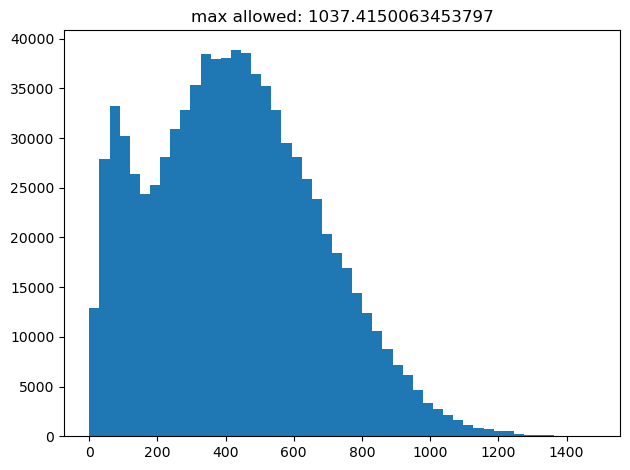

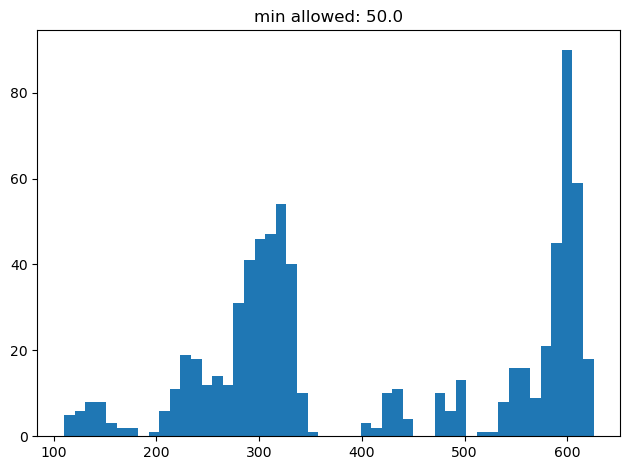

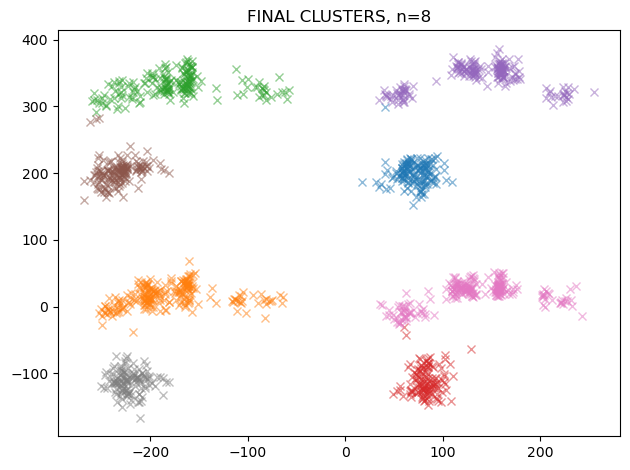

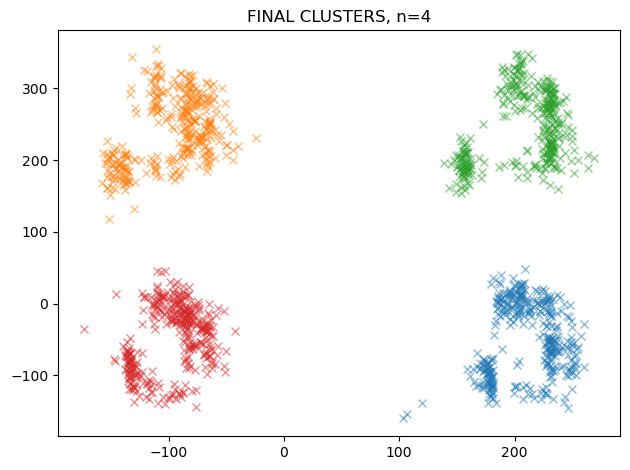

In [55]:
MS, D, shape_sequence, map_tc_to_syntaxconcrete, map_trialcode_loc_to_shape = prepare_beh_dataset(animal, date)

In [26]:
from neuralmonkey.analyses.decode_moment import train_decoder_helper, pipeline_train_test_scalar_score
import seaborn as sns

In [46]:
# [DEVO] Testing decoder on pre-stroke data (using which_level=stroke)
PLOT =False
bregion = "PMv_m"
include_null_data = False

# Train params
train_dataset = "sp_samp"
# train_dataset = "sp_prestroke"
var_train = "seqc_0_shape"
n_min_per_var = 3

# Test params
# - post-samp
test_dataset = "pig_samp_post"
var_test = "seqc_0_shape"

# - gaps (0-1)
# test_dataset = "pig_gaps_0_1"
# var_test = "shape"

# Other params
savedir = "/tmp/decoder_train_tmp"
os.makedirs(savedir, exist_ok=True)
event_train, twind_train, filterdict_train, _, _ = get_dataset_params(train_dataset)
event_test, _, filterdict_test, list_twind_test, which_level_test = get_dataset_params(test_dataset)

# Subtrract baseline?
subtract_baseline=True
subtract_baseline_twind=(-0.45, -0.05)

dfscores, Dc, PAtrain, PAtest = pipeline_train_test_scalar_score(DFallpa, bregion, var_train, event_train, twind_train, filterdict_train,
                                    var_test, event_test, list_twind_test, filterdict_test, savedir,
                                    include_null_data=include_null_data, decoder_method_index=None,
                                    prune_labels_exist_in_train_and_test=False, PLOT=PLOT,
                                    which_level_test=which_level_test,
                                    subtract_baseline=subtract_baseline, subtract_baseline_twind=subtract_baseline_twind)



Keeping n trials / total:  196 / 198
Classes, in order:  ['Lcentered-4-1-0' 'Lcentered-4-2-0' 'Lcentered-4-3-0' 'Lcentered-4-4-0'
 'V-2-2-0' 'V-2-4-0' 'arcdeep-4-2-0' 'circle-6-1-0' 'line-8-2-0'
 'usquare-1-2-0' 'usquare-1-3-0' 'usquare-1-4-0' 'zigzagSq-1-1-0'
 'zigzagSq-1-1-1' 'zigzagSq-1-2-1']
filtering with FEAT_num_strokes_task, starting len... 675
... ending len:  477


In [34]:
# Get baseline (before image turns on)
event_test, _, filterdict_test, list_twind_test, which_level_test = get_dataset_params(test_dataset)

list_twind_test = [(-0.45, -0.05)]

dfscores_baseline, _, _, _ = pipeline_train_test_scalar_score(DFallpa, bregion, var_train, event_train, twind_train, filterdict_train,
                                    var_test, event_test, list_twind_test, filterdict_test, savedir,
                                    include_null_data=include_null_data, decoder_method_index=None,
                                    prune_labels_exist_in_train_and_test=False, PLOT=False,
                                    which_level_test=which_level_test)



Keeping n trials / total:  196 / 198
Classes, in order:  ['Lcentered-4-1-0' 'Lcentered-4-2-0' 'Lcentered-4-3-0' 'Lcentered-4-4-0'
 'V-2-2-0' 'V-2-4-0' 'arcdeep-4-2-0' 'circle-6-1-0' 'line-8-2-0'
 'usquare-1-2-0' 'usquare-1-3-0' 'usquare-1-4-0' 'zigzagSq-1-1-0'
 'zigzagSq-1-1-1' 'zigzagSq-1-2-1']
filtering with FEAT_num_strokes_task, starting len... 675
... ending len:  477


In [35]:
dfscores_baseline

,score,decoder_class,decoder_class_good,pa_class,same_class,pa_class_is_in_decoder,decoder_class_is_in_pa,pa_idx,decoder_idx,trialcode,twind,epoch,decoder_class_semantic,decoder_class_semantic_str
0,0.232164,Lcentered-4-1-0,True,line-8-2-0,False,True,True,0,0,240619-1-101,"(-0.45, -0.05)",SSD2,"(False, True, True)",011
1,0.219265,Lcentered-4-2-0,True,line-8-2-0,False,True,True,0,1,240619-1-101,"(-0.45, -0.05)",SSD2,"(False, True, True)",011
2,0.027191,Lcentered-4-3-0,False,line-8-2-0,False,True,False,0,2,240619-1-101,"(-0.45, -0.05)",SSD2,"(False, False, False)",000
3,0.024823,Lcentered-4-4-0,False,line-8-2-0,False,True,False,0,3,240619-1-101,"(-0.45, -0.05)",SSD2,"(False, False, False)",000
4,0.003594,V-2-2-0,False,line-8-2-0,False,True,False,0,4,240619-1-101,"(-0.45, -0.05)",SSD2,"(False, False, False)",000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7150,0.024560,usquare-1-3-0,True,Lcentered-4-1-0,False,True,False,476,10,240619-1-83,"(-0.45, -0.05)",SSD2,"(False, True, False)",010
7151,0.056460,usquare-1-4-0,False,Lcentered-4-1-0,False,True,False,476,11,240619-1-83,"(-0.45, -0.05)",SSD2,"(False, False, False)",000
7152,0.005925,zigzagSq-1-1-0,False,Lcentered-4-1-0,False,True,False,476,12,240619-1-83,"(-0.45, -0.05)",SSD2,"(False, False, False)",000
7153,0.033486,zigzagSq-1-1-1,False,Lcentered-4-1-0,False,True,False,476,13,240619-1-83,"(-0.45, -0.05)",SSD2,"(False, False, False)",000


In [44]:
assert np.all(dfscores.loc[:, ["pa_idx", "decoder_idx"]] == dfscores_baseline.loc[:, ["pa_idx", "decoder_idx"]])

dfscores["score"] - dfscores_baseline["score"]

0      -0.073855
1       0.003138
2      -0.015433
3       0.012780
4       0.050434
          ...   
7150    0.009991
7151    0.073314
7152    0.000980
7153    0.146249
7154    0.037193
Name: score, Length: 7155, dtype: float64

In [ ]:
# TODO: Split by early vs. late in planning period.
# TODO: Including between strokes (gaps) as well.
# --> syntax_role_v2 would be same except consider stroke 2 as stroke 1...


In [ ]:
# Two kinds of shape (TI) related params:
# - trial level, 
# - decoder class level.



In [56]:
SAVEDIR_BASE = "/tmp"


Keeping n trials / total:  196 / 198
Classes, in order:  ['Lcentered-4-1-0' 'Lcentered-4-2-0' 'Lcentered-4-3-0' 'Lcentered-4-4-0'
 'V-2-2-0' 'V-2-4-0' 'arcdeep-4-2-0' 'circle-6-1-0' 'line-8-2-0'
 'usquare-1-2-0' 'usquare-1-3-0' 'usquare-1-4-0' 'zigzagSq-1-1-0'
 'zigzagSq-1-1-1' 'zigzagSq-1-2-1']
filtering with FEAT_num_strokes_task, starting len... 675
... ending len:  477
Saving plots at ...  //tmp/syntax_TI_plots/scalar/train_data=sp_samp-test_data=pig_samp_post-combine_False-include_null=False-nmin=3/decoder_training/M1_m


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/code/pythonlib/pythonlib/tools/snstools.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list_text,rotation=rotation, horizontalalignment="right")
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/code/pythonlib/pythonlib/tools/snstools.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list_text,rotation=rotation, horizontalalignment="right")
/


2862
1824


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/

Keeping n trials / total:  196 / 198
Classes, in order:  ['Lcentered-4-1-0' 'Lcentered-4-2-0' 'Lcentered-4-3-0' 'Lcentered-4-4-0'
 'V-2-2-0' 'V-2-4-0' 'arcdeep-4-2-0' 'circle-6-1-0' 'line-8-2-0'
 'usquare-1-2-0' 'usquare-1-3-0' 'usquare-1-4-0' 'zigzagSq-1-1-0'
 'zigzagSq-1-1-1' 'zigzagSq-1-2-1']
filtering with FEAT_num_strokes_task, starting len... 675
... ending len:  477
Saving plots at ...  //tmp/syntax_TI_plots/scalar/train_data=sp_samp-test_data=pig_samp_post-combine_False-include_null=False-nmin=3/decoder_training/M1_l


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/code/pythonlib/pythonlib/tools/snstools.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list_text,rotation=rotation, horizontalalignment="right")
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/code/pythonlib/pythonlib/tools/snstools.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list_text,rotation=rotation, horizontalalignment="right")
/


2862
1824


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/

Keeping n trials / total:  196 / 198
Classes, in order:  ['Lcentered-4-1-0' 'Lcentered-4-2-0' 'Lcentered-4-3-0' 'Lcentered-4-4-0'
 'V-2-2-0' 'V-2-4-0' 'arcdeep-4-2-0' 'circle-6-1-0' 'line-8-2-0'
 'usquare-1-2-0' 'usquare-1-3-0' 'usquare-1-4-0' 'zigzagSq-1-1-0'
 'zigzagSq-1-1-1' 'zigzagSq-1-2-1']
filtering with FEAT_num_strokes_task, starting len... 675
... ending len:  477
Saving plots at ...  //tmp/syntax_TI_plots/scalar/train_data=sp_samp-test_data=pig_samp_post-combine_False-include_null=False-nmin=3/decoder_training/PMv_l


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/code/pythonlib/pythonlib/tools/snstools.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list_text,rotation=rotation, horizontalalignment="right")
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/code/pythonlib/pythonlib/tools/snstools.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list_text,rotation=rotation, horizontalalignment="right")
/


2862
1824


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/

Keeping n trials / total:  196 / 198
Classes, in order:  ['Lcentered-4-1-0' 'Lcentered-4-2-0' 'Lcentered-4-3-0' 'Lcentered-4-4-0'
 'V-2-2-0' 'V-2-4-0' 'arcdeep-4-2-0' 'circle-6-1-0' 'line-8-2-0'
 'usquare-1-2-0' 'usquare-1-3-0' 'usquare-1-4-0' 'zigzagSq-1-1-0'
 'zigzagSq-1-1-1' 'zigzagSq-1-2-1']
filtering with FEAT_num_strokes_task, starting len... 675
... ending len:  477
Saving plots at ...  //tmp/syntax_TI_plots/scalar/train_data=sp_samp-test_data=pig_samp_post-combine_False-include_null=False-nmin=3/decoder_training/PMv_m


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/code/pythonlib/pythonlib/tools/snstools.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list_text,rotation=rotation, horizontalalignment="right")
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/code/pythonlib/pythonlib/tools/snstools.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list_text,rotation=rotation, horizontalalignment="right")
/


2862
1824


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x70bdaf8b61f0>
Traceback (most recent call last):
  File "/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/weakref.py", line 51, in _cb
    def _cb(arg):
KeyboardInterrupt: 
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args

KeyboardInterrupt: 

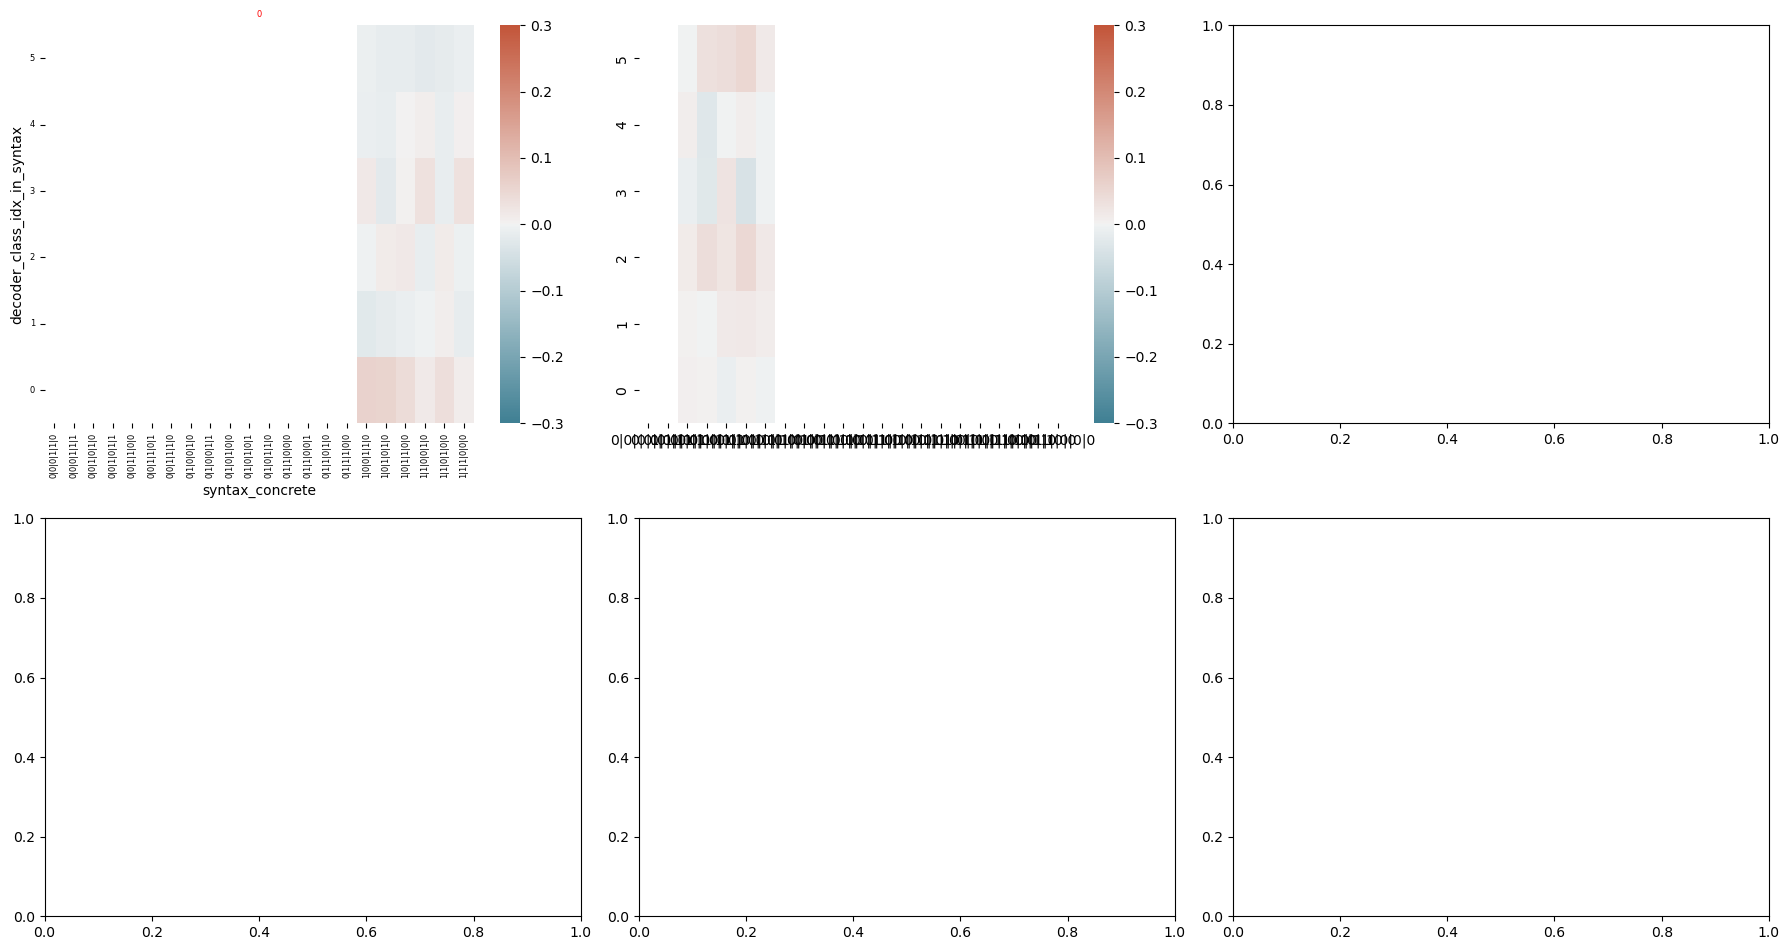

In [57]:
# Pipeline to train and test

include_null_data = False

# Train params
train_dataset = "sp_samp"
# train_dataset = "sp_prestroke"
var_train = "seqc_0_shape"

# Test params
# - post-samp
# test_dataset = "pig_samp_post_early"
var_test = "seqc_0_shape"

# - gaps (0-1)
# test_dataset = "pig_gaps_0_1"
# var_test = "shape"

# Subtrract baseline?
subtract_baseline=True
subtract_baseline_twind=(-0.45, -0.05)

SAVEDIR = f"{SAVEDIR_BASE}/syntax_TI_plots/scalar/train_data={train_dataset}-test_data={test_dataset}-combine_{COMBINE_AREAS}-include_null={include_null_data}-nmin={n_min_per_var}"

list_bregion = DFallpa["bregion"].unique().tolist()
for bregion in list_bregion:

    # Other params
    savedir = f"/{SAVEDIR}/decoder_training/{bregion}"
    os.makedirs(savedir, exist_ok=True)
    PLOT = True

    event_train, twind_train, filterdict_train, _, _ = get_dataset_params(train_dataset)
    event_test, _, filterdict_test, list_twind_test, which_level_test = get_dataset_params(test_dataset)

    dfscores, Dc, PAtrain, PAtest = pipeline_train_test_scalar_score(DFallpa, bregion, var_train, event_train, twind_train, filterdict_train,
                                        var_test, event_test, list_twind_test, filterdict_test, savedir,
                                        include_null_data=include_null_data, decoder_method_index=None,
                                        prune_labels_exist_in_train_and_test=False, PLOT=PLOT,
                                        which_level_test=which_level_test, n_min_per_var=n_min_per_var,
                                        subtract_baseline=subtract_baseline, subtract_baseline_twind=subtract_baseline_twind)

    # Keep only decoder class that is in shape sequence
    dfscores = dfscores[dfscores["decoder_class"].isin(shape_sequence)].reset_index(drop=True)
    # make sure all test trials' labels are in decoder
    assert np.all(dfscores["pa_class_is_in_decoder"]==True)

    # Append useful information about the shape sequence on each trial
    # (1) Get dflab
    dflab = PAtest.Xlabels["trials"]
    if which_level_test == "stroke":
        # Hacky, update dflab so that it has the trial data too. Makes a copy of dflab, appending columns from trialcode.
        from pythonlib.tools.pandastools import slice_by_row_label, merge_subset_indices_prioritizing_second
        # event_test, _, filterdict_test, list_twind_test, which_level_test
        PAtrial = extract_single_pa(DFallpa, bregion, None, "trial", "03_samp")
        list_tc = dflab["trialcode"].tolist()
        _dflab_trial_toappend = slice_by_row_label(PAtrial.Xlabels["trials"], "trialcode", list_tc)
        dflab = merge_subset_indices_prioritizing_second(dflab, _dflab_trial_toappend, "trialcode")    

    # map from trialcode to syntax
    list_trialcode = dflab["trialcode"]
    map_tc_to_syntaxconcrete = {}
    for i, row in dflab.iterrows():
        tc = row["trialcode"]
        if row["epoch"] in ["base", "baseline"]:
            map_tc_to_syntaxconcrete[tc] = None
        else:
            tmp = D.Dat[D.Dat["trialcode"]==tc]
            assert len(tmp)==1
            map_tc_to_syntaxconcrete[tc] = tmp["syntax_concrete"].values[0]

    list_decoder_class_idx_in_shapes_drawn = []
    list_decoder_class_idx_in_syntax = []
    list_decoder_class_was_drawn = []
    list_decoder_class_was_first_drawn = []
    list_syntax_concrete = []
    list_syntax_role = []
    list_rank_dist_0_1_correct = []

    for _i, row in dfscores.iterrows():

        decoder_class = row["decoder_class"]
        pa_idx = row["pa_idx"]
        trialcode = row["trialcode"]
        epoch = row["epoch"]

        shapes_drawn = dflab.iloc[pa_idx]["shapes_drawn"]
        decoder_class_idx_in_syntax = shape_sequence.index(decoder_class)

        if decoder_class in shapes_drawn:
            decoder_class_idx_in_shapes_drawn = shapes_drawn.index(decoder_class)
        else:
            decoder_class_idx_in_shapes_drawn = -1

        syntax_concrete = map_tc_to_syntaxconcrete[trialcode]
        syntax_concrete_indices = tuple(np.argwhere(syntax_concrete).squeeze().tolist())
        if len(syntax_concrete_indices)>1:
            rank_dist_0_1_correct = syntax_concrete_indices[1] - syntax_concrete_indices[0]
        else:
            rank_dist_0_1_correct = -1

        if epoch in ["base", "baseline"]:
            syntax_role = None
        else:
            if syntax_concrete[decoder_class_idx_in_syntax] == 1:
                syntax_role = "visible"
            else:
                a = syntax_concrete[decoder_class_idx_in_syntax] == 0
                b = sum(syntax_concrete[:decoder_class_idx_in_syntax])>0
                c = sum(syntax_concrete[decoder_class_idx_in_syntax+1:])>0
                d = (decoder_class_idx_in_syntax > syntax_concrete_indices[0]) & (decoder_class_idx_in_syntax < syntax_concrete_indices[1])
                e = decoder_class_idx_in_syntax == syntax_concrete_indices[0]-1

                if a & b & c & d:
                    syntax_role = "within_idx_0_1"
                elif a & b & c & ~d:
                    syntax_role = "within_idx_others"
                elif e:
                    syntax_role = "outside_preidx0"
                else:
                    syntax_role = "outside"

        # Get rank distance between first and second shapes
        # if len(shapes_drawn)
        # rank_distance_0_1 = shape_sequence.index(shapes_drawn[1]) - shape_sequence.index(shapes_drawn[0])
        
        row["decoder_class_idx_in_syntax"] = decoder_class_idx_in_syntax

        list_decoder_class_idx_in_shapes_drawn.append(decoder_class_idx_in_shapes_drawn)
        list_decoder_class_idx_in_syntax.append(decoder_class_idx_in_syntax)
        list_decoder_class_was_drawn.append(decoder_class in shapes_drawn)
        list_decoder_class_was_first_drawn.append(decoder_class == shapes_drawn[0])
        list_syntax_concrete.append(syntax_concrete)
        list_syntax_role.append(syntax_role)
        list_rank_dist_0_1_correct.append(rank_dist_0_1_correct)
        
    dfscores["decoder_class_idx_in_shapes_drawn"] = list_decoder_class_idx_in_shapes_drawn
    dfscores["decoder_class_idx_in_syntax"] = list_decoder_class_idx_in_syntax
    dfscores["decoder_class_was_drawn"] = list_decoder_class_was_drawn
    dfscores["decoder_class_was_first_drawn"] = list_decoder_class_was_first_drawn
    dfscores["syntax_concrete"] = list_syntax_concrete
    dfscores["syntax_role"] = list_syntax_role
    dfscores["rank_dist_0_1_correct"] = list_rank_dist_0_1_correct

    dfscores["syntax_concrete_indices"] = [tuple(np.argwhere(syntax_concrete).squeeze().tolist()) for syntax_concrete in dfscores["syntax_concrete"]]
    dfscores["syntax_concrete_idx1"] = [sci[0] for sci in dfscores["syntax_concrete_indices"]]
    dfscores["syntax_concrete_idxlast"] = [sci[-1] for sci in dfscores["syntax_concrete_indices"]]
    dfscores["syntax_concrete_idx1_drawn"] = [sc[0]==1 for sc in dfscores["syntax_concrete"]]

    from pythonlib.tools.pandastools import append_col_with_grp_index
    dfscores = append_col_with_grp_index(dfscores, ["syntax_concrete_idx1", "rank_dist_0_1_correct"], "sytx_idx1_rank")

    # More easily semantic
    def F(row):
        if row["decoder_class_idx_in_shapes_drawn"] == -1:
            tmp = row["syntax_role"]
        else:
            if row["decoder_class_idx_in_shapes_drawn"]>1:
                # stroke 2+, this is ignored by him
                tmp = (row["decoder_class_idx_in_shapes_drawn"], "all")
            elif row["syntax_concrete_indices"][0]>0 and row["syntax_concrete_indices"][1]+1 < len(row["syntax_concrete"]):
                # 0tha nd 1th stroke, hard
                tmp = (row["decoder_class_idx_in_shapes_drawn"], "hard")
            else:
                # 0tha nd 1th stroke, easys
                tmp = (row["decoder_class_idx_in_shapes_drawn"], "easy")
        return tmp

    dfscores["syntax_role_v2"] = [F(row) for i, row in dfscores.iterrows()]

    # Normalize decode by subtracting mean within each decoder class
    if False: # Normalize by subtracting  mean for each decode class
        from pythonlib.tools.pandastools import datamod_normalize_row_after_grouping_within
        datamod_normalize_row_after_grouping_within(dfscores, "decoder_class", "score")
    else: # Subtract when the ddeocde class is not visible
        from pythonlib.tools.pandastools import datamod_normalize_row_after_grouping_return_same_len_df
        dfscores["baseline_norm"] = [sr!="visible" for sr in dfscores["syntax_role"]]
        dfscores, _, _ = datamod_normalize_row_after_grouping_return_same_len_df(dfscores, 
                                                                                "baseline_norm", 
                                                                                ["decoder_class_idx_in_syntax"], 
                                                                                "score", True, True)

    # (1) keep only successful trials.
    trialcodes_success = D.Dat[D.Dat["success_binary_quick"]==True]["trialcode"].tolist()
    print(len(dfscores))
    dfscores_success = dfscores[dfscores["trialcode"].isin(trialcodes_success)].reset_index(drop=True)
    print(len(dfscores_success))

    from pythonlib.tools.pandastools import stringify_values
    dfscores_str = stringify_values(dfscores)
    dfscores_str_success = stringify_values(dfscores_success)


    # Save the dataframe
    pd.to_pickle(dfscores, f"{SAVEDIR}/{bregion}-dfscores.pkl")
    pd.to_pickle(dfscores_success, f"{SAVEDIR}/{bregion}-dfscores_success.pkl")

    ####################################### PLOTS
    from pythonlib.tools.pandastools import plot_subplots_heatmap
    from pythonlib.tools.snstools import rotateLabel


    from pythonlib.tools.plottools import savefig

    list_df_ver = ["all", "success"]
    for df_ver in list_df_ver:
        if df_ver == "all":
            dfthis = dfscores_str
        elif df_ver == "success":
            dfthis = dfscores_str_success
        else:
            assert False
        row_values = sorted(dfthis["decoder_class_idx_in_syntax"].unique())[::-1]
        col_values = sorted(dfthis["syntax_concrete"].unique())

        savedir = f"{SAVEDIR}/{bregion}-df_ver={df_ver}"
        os.makedirs(savedir, exist_ok=True)

        for var_score_meth in [0, 1, 2]:

            if var_score_meth==0:
                var_score = "score"
                norm_method = None
                zlims = [0, 0.5]
                diverge = False
            elif var_score_meth==1:
                var_score = "score_norm"
                norm_method = None
                zlims = [-0.3, 0.3]
                diverge = True
            elif var_score_meth==2:
                var_score = "score_min_base"
                norm_method = None
                zlims = [-0.3, 0.3]
                diverge = True
            else:
                assert False
            
            fig, axes = plot_subplots_heatmap(dfthis, "decoder_class_idx_in_syntax", "syntax_concrete", var_score, "epoch",
                                annotate_heatmap=False, norm_method=norm_method, 
                                row_values=row_values, col_values=col_values, ZLIMS=zlims, share_zlim=True, W=6, diverge=diverge)
            for ax in axes.flatten():
                for x, cat in enumerate(col_values):
                    ys = _syntax_concrete_string_to_indices(cat)
                    # print(cat, " -- ", ys, " -- ", x)
                    ax.plot([x+0.5 for _ in range(len(ys))], [len(row_values) - 1 - y+0.5 for y in ys], "ok", mfc="none")
            savefig(fig, f"{savedir}/heatmap-decode_vs_syntconcrete-var_score={var_score}.pdf")

            for var_subplot in ["syntax_role", "syntax_role_v2", "rank_dist_0_1_correct", "sytx_idx1_rank", "syntax_concrete_idx1", "syntax_concrete_idxlast"]:
                fig, axes = plot_subplots_heatmap(dfthis, "decoder_class_idx_in_syntax", "syntax_concrete", var_score, var_subplot,
                                    annotate_heatmap=False, norm_method=norm_method, 
                                    row_values=row_values, col_values=col_values, ZLIMS=zlims, share_zlim=True, W=6, diverge=diverge)
                for ax in axes.flatten():
                    for x, cat in enumerate(col_values):
                        ys = _syntax_concrete_string_to_indices(cat)
                        # print(cat, " -- ", [len(col_values) - 1 - y+0.5 for y in ys], " -- ", [x+0.5 for _ in range(len(ys))])
                        ax.plot([x+0.5 for _ in range(len(ys))], [len(row_values) - 1 - y+0.5 for y in ys], "ok", mfc="none")
                savefig(fig, f"{savedir}/heatmap-decode_vs_syntconcrete-var_score={var_score}-subplot_{var_subplot}.pdf")

                plt.close("all")

            # # Effect, as function of index

            fig = sns.catplot(data=dfthis, x = "decoder_class_idx_in_syntax", y=var_score, col="sytx_idx1_rank", hue="decoder_class_was_drawn", col_wrap=6, kind="point", errorbar=("ci", 68))
            for ax in fig.axes.flatten():
                ax.axhline(0, color="k", alpha=0.5)
            savefig(fig, f"{savedir}/catplot-sytx_idx1_rank-var_score={var_score}-1.pdf")


            fig = sns.catplot(data=dfthis, x = "decoder_class_idx_in_shapes_drawn", y=var_score, col="sytx_idx1_rank", hue="decoder_class_was_drawn", col_wrap=6, kind="point", errorbar=("ci", 68))
            for ax in fig.axes.flatten():
                ax.axhline(0, color="k", alpha=0.5)
            savefig(fig, f"{savedir}/catplot-sytx_idx1_rank-var_score={var_score}-2.pdf")
            plt.close("all")


                
            fig, axes = plot_subplots_heatmap(dfthis, "syntax_role_v2", "decoder_class_idx_in_syntax", var_score, "epoch", diverge=diverge, ZLIMS=zlims)
            savefig(fig, f"{savedir}/heatmap-syntax_role_v2-var_score={var_score}.pdf")

            from pythonlib.tools.pandastools import extract_with_levels_of_conjunction_vars_helper

            path = f"{savedir}/counts-syntax_role_v2.pdf"
            _, _ = extract_with_levels_of_conjunction_vars_helper(dfthis, "syntax_role_v2", ("decoder_class_idx_in_syntax",), 3, path, 3)

            plt.close("all")


            order = sorted(dfthis["syntax_role_v2"].unique())

            fig = sns.catplot(data=dfthis, x = "syntax_role_v2", y=var_score, kind="bar", errorbar=("ci", 68), aspect=1,
                            order=order)
            rotateLabel(fig)
            for ax in fig.axes.flatten():
                ax.axhline(0, color="k", alpha=0.5)
            savefig(fig, f"{savedir}/catplot-syntax_role_v2-var_score={var_score}-1.pdf")

            fig = sns.catplot(data=dfthis, x = "syntax_role_v2", y=var_score, hue="decoder_class_idx_in_syntax", kind="point", errorbar=("ci", 68), aspect=1,
                            order=order)
            rotateLabel(fig)
            for ax in fig.axes.flatten():
                ax.axhline(0, color="k", alpha=0.5)
            savefig(fig, f"{savedir}/catplot-syntax_role_v2-var_score={var_score}-2.pdf")
            plt.close("all")

            order = sorted(dfthis["syntax_role"].unique())

            fig = sns.catplot(data=dfthis, x = "syntax_role", y=var_score, kind="bar", errorbar=("ci", 68), aspect=1,
                            order=order)
            rotateLabel(fig)
            for ax in fig.axes.flatten():
                ax.axhline(0, color="k", alpha=0.5)
            savefig(fig, f"{savedir}/catplot-syntax_role-var_score={var_score}-1.pdf")

            fig = sns.catplot(data=dfthis, x = "syntax_role", y=var_score, hue="decoder_class_idx_in_syntax", kind="point", errorbar=("ci", 68), aspect=1,
                            order=order)
            rotateLabel(fig)
            for ax in fig.axes.flatten():
                ax.axhline(0, color="k", alpha=0.5)
            savefig(fig, f"{savedir}/catplot-syntax_role-var_score={var_score}-2.pdf")
            plt.close("all")


            fig = sns.catplot(data=dfthis, x="syntax_concrete_idx1", y=var_score, errorbar=("ci", 68), hue="decoder_class_idx_in_shapes_drawn", kind="bar")
            for ax in fig.axes.flatten():
                ax.axhline(0, color="k", alpha=0.5)
            savefig(fig, f"{savedir}/catplot-syntax_concrete_idx1-var_score={var_score}-1.pdf")

            # fig = sns.catplot(data=dfthis, x="decoder_class_idx_in_shapes_drawn", y=var_score, errorbar=("ci", 68), hue="syntax_concrete_idx1", kind="point")
            # for ax in fig.axes.flatten():
            #     ax.axhline(0, color="k", alpha=0.5)
            # savefig(fig, f"{savedir}/catplot-syntax_concrete_idx1-var_score={var_score}-2.pdf")

            fig = sns.catplot(data=dfthis, x="decoder_class_idx_in_shapes_drawn", y=var_score, errorbar=("ci", 68), hue="rank_dist_0_1_correct", col="syntax_concrete_idx1", col_wrap=4, kind="point")
            for ax in fig.axes.flatten():
                ax.axhline(0, color="k", alpha=0.5)
            savefig(fig, f"{savedir}/catplot-syntax_concrete_idx1-var_score={var_score}-3.pdf")
            plt.close("all")

            # Related to decoder rank in shapes drawn
            # fig = sns.catplot(data=dfthis, x="decoder_class_idx_in_shapes_drawn", y=var_score, kind="point", errorbar=("ci", 68))
            # rotateLabel(fig)
            # for ax in fig.axes.flatten():
            #     ax.axhline(0, color="k", alpha=0.5)
            # savefig(fig, f"{savedir}/catplot-decoder_class_idx_in_shapes_drawn-var_score={var_score}-1.pdf")

            # fig = sns.catplot(data=dfthis, x="decoder_class_idx_in_shapes_drawn", y=var_score, kind="point", errorbar=("ci", 68),
            #             hue="decoder_class_idx_in_syntax")
            # rotateLabel(fig)
            # for ax in fig.axes.flatten():
            #     ax.axhline(0, color="k", alpha=0.5)
            # savefig(fig, f"{savedir}/catplot-decoder_class_idx_in_shapes_drawn-var_score={var_score}-2.pdf")

            # fig = sns.catplot(data=dfthis, x="decoder_class_idx_in_shapes_drawn", y=var_score, kind="point", errorbar=("ci", 68),
            #             hue="syntax_concrete", col="decoder_class_idx_in_syntax")
            # rotateLabel(fig)
            # for ax in fig.axes.flatten():
            #     ax.axhline(0, color="k", alpha=0.5)
            # savefig(fig, f"{savedir}/catplot-decoder_class_idx_in_shapes_drawn-var_score={var_score}-3.pdf")


            # fig = sns.catplot(data=dfthis, x="decoder_class_idx_in_shapes_drawn", y=var_score, kind="point", errorbar=("ci", 68),
            #             hue="syntax_concrete_idx1")
            # rotateLabel(fig)
            # for ax in fig.axes.flatten():
            #     ax.axhline(0, color="k", alpha=0.5)
            # savefig(fig, f"{savedir}/catplot-decoder_class_idx_in_shapes_drawn-var_score={var_score}-4.pdf")
            

            for hue in [None, "decoder_class_idx_in_syntax", "syntax_concrete_idx1", "syntax_concrete_idx1_drawn"]:
                fig = sns.catplot(data=dfthis, x = "decoder_class_idx_in_shapes_drawn", y=var_score, 
                                    kind="point", errorbar=("ci", 68), hue = hue)
                for ax in fig.axes.flatten():
                    ax.axhline(0, color="k", alpha=0.5)
                savefig(fig, f"{savedir}/catplot-decoder_class_idx_in_shapes_drawn-hue={hue}-var_score={var_score}.pdf")
            
            plt.close("all")


# 5b. Load mult and summarize [SCALAR]

In [ ]:
from neuralmonkey.classes.session import _REGIONS_IN_ORDER, _REGIONS_IN_ORDER_COMBINED
import seaborn as sns
from pythonlib.tools.snstools import rotateLabel

In [ ]:
def plot_all(dfthis, savedir, var_score):
    from pythonlib.tools.plottools import savefig
    print("Saving figures to: ", savedir)
    
    for hue in [None, "date", "decoder_class_idx_in_syntax", "syntax_concrete_idx1", "syntax_concrete_idx1_drawn"]:
        fig = sns.catplot(data=dfthis, x = "decoder_class_idx_in_shapes_drawn", y=var_score, 
                        col="bregion", col_wrap=6,
                            kind="point", errorbar=("ci", 68), hue = hue)
        for ax in fig.axes.flatten():
            ax.axhline(0, color="k", alpha=0.5)
        savefig(fig, f"{savedir}/catplot-decoder_class_idx_in_shapes_drawn-hue={hue}-var_score={var_score}.pdf")
        plt.close("all")
    
    for hue in [None, "date", "decoder_class_was_drawn", "decoder_class_idx_in_shapes_drawn", "syntax_concrete_idx1", "syntax_concrete_idx1_drawn"]:
        fig = sns.catplot(data=dfthis, x = "decoder_class_idx_in_syntax", y=var_score, 
                        col="bregion", col_wrap=6, kind="point", errorbar=("ci", 68), hue = hue)
        for ax in fig.axes.flatten():
            ax.axhline(0, color="k", alpha=0.5)
        savefig(fig, f"{savedir}/catplot-decoder_class_idx_in_syntax-hue={hue}-var_score={var_score}.pdf")
        plt.close("all")
    
    for x_var in ["syntax_role_v2", "syntax_role"]:
        order = sorted(dfthis[x_var].unique())

        fig = sns.catplot(data=dfthis, x = x_var, y=var_score, kind="bar", errorbar=("ci", 68), aspect=1,
                        col = "bregion", col_wrap=6, order=order)
        rotateLabel(fig)
        for ax in fig.axes.flatten():
            ax.axhline(0, color="k", alpha=0.5)
        savefig(fig, f"{savedir}/catplot-{x_var}-var_score={var_score}-1.pdf")

        fig = sns.catplot(data=dfthis, x = x_var, y=var_score, hue="decoder_class_idx_in_syntax", kind="point", errorbar=("ci", 68), aspect=1,
                        col = "bregion", col_wrap=6, order=order)
        rotateLabel(fig)
        for ax in fig.axes.flatten():
            ax.axhline(0, color="k", alpha=0.5)
        savefig(fig, f"{savedir}/catplot-{x_var}-var_score={var_score}-2.pdf")
        plt.close("all")

    from pythonlib.tools.pandastools import plot_subplots_heatmap

    def _syntax_concrete_string_to_indices(s):
        """
        PARAMS:
        - s, like 
            s = "0|0|0|1|1|0"
        RETURNS:
        - s --> list of int indices where 1's are
        """
        ys = []
        for i, _tmp in enumerate(s[0::2]):
            if _tmp=="1":
                ys.append(i)
        return ys

    if var_score == "score":
        norm_method = None
        zlims = [0, 0.45]
        diverge = False
    elif var_score == "score_norm":
        norm_method = None
        zlims = [-0.28, 0.28]
        diverge = True
    elif var_score == "score_min_base":
        norm_method = None
        zlims = [-0.3, 0.3]
        diverge = True
    else:
        assert False

    row_values = sorted(dfthis["decoder_class_idx_in_syntax"].unique())[::-1]
    col_values = sorted(dfthis["syntax_concrete"].unique())

    fig, axes = plot_subplots_heatmap(dfthis, "decoder_class_idx_in_syntax", "syntax_concrete", var_score, "bregion",
                        annotate_heatmap=False, norm_method=norm_method, 
                        row_values=row_values, col_values=col_values, ZLIMS=zlims, share_zlim=True, W=6, diverge=diverge)
    for ax in axes.flatten():
        for x, cat in enumerate(col_values):
            ys = _syntax_concrete_string_to_indices(cat)
            ax.plot([x+0.5 for _ in range(len(ys))], [len(row_values) - 1 - y+0.5 for y in ys], "ok", mfc="none")
    savefig(fig, f"{savedir}/heatmap-decode_vs_syntconcrete-var_score={var_score}.pdf")

    plt.close("all")


In [ ]:
# SAVEDIR = "/lemur2/lucas/analyses/recordings/main/decode_moment/PIG/Pancho-240612-ipynb_params_2
SAVEDIR = "/lemur2/lucas/analyses/recordings/main/decode_moment/PIG"

suff = "ipynb_params_2"

for animal in ["Diego", "Pancho"]:
    for combine_areas in [False, True]:
        # animal = "Diego"
        # combine_areas = False

        train_data = "sp_samp"
        test_data = "pig_samp_post"
        include_null = False
        nmin = 3

        dfver = "dfscores_success"
        # dfver = "dfscores"

        if combine_areas:
            list_regions = _REGIONS_IN_ORDER_COMBINED
        else:
            list_regions = _REGIONS_IN_ORDER

        if animal=="Pancho":
            list_date = [240612, 240618, 240619]
            regions_ignore = ["PMv_l"]
        elif animal== "Diego":
            list_date = [240619, 240620, 240625]
            regions_ignore = ["dlPFC_p"]
        else:
            assert False

        list_regions = [reg for reg in list_regions if reg not in regions_ignore]

        list_df = []
        for date in list_date:
            for bregion in list_regions:
                print(date, bregion)
                path = f"{SAVEDIR}/{animal}-{date}-{suff}/syntax_TI_plots/train_data={train_data}-test_data={test_data}-combine_{combine_areas}-include_null={include_null}-nmin={nmin}/{bregion}-{dfver}.pkl"
                df = pd.read_pickle(path)
                df["bregion"] = bregion
                df["date"] = date
                list_df.append(df)

        DFSCORES = pd.concat(list_df).reset_index(drop=True)

        # sAve dir
        day1 = sorted(list_date)[0]
        day2 = sorted(list_date)[-1]
        SAVEDIR_MULT = f"{SAVEDIR}/MULT/{animal}-{day1}-to-{day2}-combine={combine_areas}"
        os.makedirs(SAVEDIR_MULT, exist_ok=True)
        print(SAVEDIR_MULT)

        # Add things to dataframe
        DFSCORES["syntax_concrete_idx1_drawn"] = [sc[0]==1 for sc in DFSCORES["syntax_concrete"]]
        from pythonlib.tools.pandastools import stringify_values
        DFSCORES_STR = stringify_values(DFSCORES)
        
        ## INDIVIDUAL DAYS
        for date in list_date:
            dfthis = DFSCORES_STR[DFSCORES_STR["date"] == date].reset_index(drop=True)
            savedir = f"{SAVEDIR_MULT}/each_day/{date}"
            os.makedirs(savedir, exist_ok=True)
            for var_score in ["score", "score_norm"]:
                plot_all(dfthis, savedir, var_score)
            
        # Plot mean across days
        dfthis = DFSCORES_STR
        savedir = f"{SAVEDIR_MULT}/combine_days"
        os.makedirs(savedir, exist_ok=True)
        for var_score in ["score", "score_norm", "score_min_base"]:
            plot_all(dfthis, savedir, var_score)


# 6. Average timecourse of decode

In [ ]:
SAVEDIR_BASE = "/tmp"

In [ ]:
##### Testing


In [60]:
DEBUG = True


In [215]:
SAVEDIR_BASE

'/tmp'

In [214]:
SAVEDIR

'/tmp/syntax_TI_plots/timecourse/var_train=seqc_0_shape-var_test=seqc_0_shape-combine=False/PMv_l'

Keeping n trials / total:  196 / 198
Classes, in order:  ['Lcentered-4-1-0' 'Lcentered-4-2-0' 'Lcentered-4-3-0' 'Lcentered-4-4-0'
 'V-2-2-0' 'V-2-4-0' 'arcdeep-4-2-0' 'circle-6-1-0' 'line-8-2-0'
 'usquare-1-2-0' 'usquare-1-3-0' 'usquare-1-4-0' 'zigzagSq-1-1-0'
 'zigzagSq-1-1-1' 'zigzagSq-1-2-1']
filtering with FEAT_num_strokes_task, starting len... 675
... ending len:  477
0
1
2
3
4
5
6
7
8
9
10
11
Saving to ... /tmp/syntax_TI_plots/timecourse/var_train=seqc_0_shape-var_test=seqc_0_shape-combine=False/M1_m/norm=None
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2]}
PLOTTING... ()  (6, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [0]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
PLOTTING... ()  (4, 4, 86)
PLOTTING... ()  (2, 4

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [3], 'FEAT_num_strokes_beh': [3], 'sytx_onset_offset_separated': [(False, False, True)]}
PLOTTING... ()  (1, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [3], 'FEAT_num_strokes_beh': [3], 'sytx_onset_offset_separated': [(False, True, True)]}
PLOTTING... ()  (1, 4, 86)
PLOTTING... ()  (3, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [3], 'FEAT_num_strokes_beh': [3], 'sytx_onset_offset_separated': [(True, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [3], 'FEAT_num_strokes_beh': [3], 'sytx_onset_offset_separated': [(True, True, True)]}


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [0]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
PLOTTING... ()  (4, 4, 86)
PLOTTING... ()  (2, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [0]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [1]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [2]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [3, 4, 5, 6, 7, 8, 9]}
PLOTTING... ()  (4, 4, 86)
PLOTTING... ()  (1, 4, 86)
SKIPPING!! this filtdict led to al

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [0]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
PLOTTING... ()  (4, 4, 86)
PLOTTING... ()  (2, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [0]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [1]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [2]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [3, 4, 5, 6, 7, 8, 9]}
PLOTTING... ()  (4, 4, 86)
PLOTTING... ()  (1, 4, 86)
SKIPPING!! this filtdict led to al

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [0]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
PLOTTING... ()  (4, 4, 86)
PLOTTING... ()  (2, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [0]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [1]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [2]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [3, 4, 5, 6, 7, 8, 9]}
PLOTTING... ()  (4, 4, 86)
PLOTTING... ()  (1, 4, 86)
SKIPPING!! this filtdict led to al

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [3], 'FEAT_num_strokes_beh': [3], 'syntax_concrete_idx1': [2]}
PLOTTING... ()  (1, 4, 86)


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [0]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
PLOTTING... ()  (4, 4, 86)
PLOTTING... ()  (2, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [0]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [1]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [2]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'syntax_concrete_idx1': [3, 4, 5, 6, 7, 8, 9]}
PLOTTING... ()  (4, 4, 86)
PLOTTING... ()  (1, 4, 86)
SKIPPING!! this filtdict led to al

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... () 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, True)]}
SKIPPING!! this filtdict led 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lucas/miniconda3/envs/drag2

SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(False, False, False), (False, False, True), (False, True, False), (False, True, True)]}
SKIPPING!! this filtdict led to all data lost:
{'FEAT_num_strokes_task': [2], 'FEAT_num_strokes_beh': [2], 'sytx_onset_offset_separated': [(True, False, False), (True, False, True), (True, True, False), (True, True, True)]}
PLOTTING... ()  (2, 4, 86)
PLOTTING... ()  (4, 4, 86)


KeyboardInterrupt: 

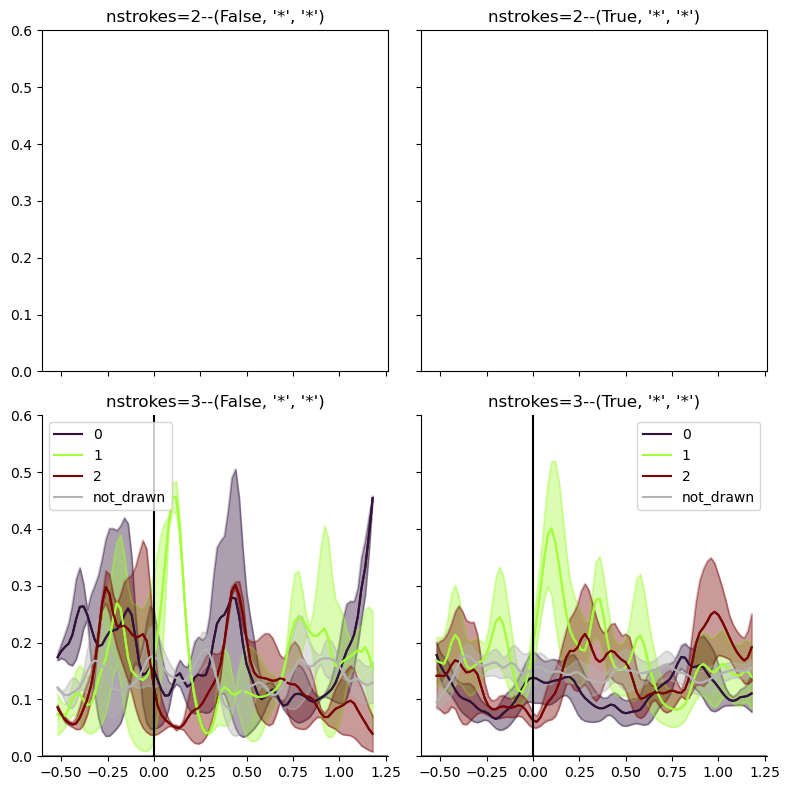

In [219]:

list_bregion = DFallpa["bregion"].unique().tolist()
for bregion in list_bregion:
    for var_train, var_test, labels_in_order_keep in [
        ("seqc_0_shape", "seqc_0_shape", shape_sequence),
        ("seqc_0_loc", "seqc_0_loc", None),
        ]:
        include_null_data = False
        twind_test = [-0.6, 1.8]

        # --------------------
        # var_train = "seqc_0_shape"
        # var_test = "seqc_0_shape"
        # labels_in_order_keep = shape_sequence

        # var_train = "seqc_0_loc"
        # var_test = "seqc_0_loc"
        # labels_in_order_keep = None

        # -------------------

        train_dataset = "sp_samp"
        n_min_per_var = 3

        # Test params
        # - post-samp
        test_dataset = "pig_samp_post"

        event_train, twind_train, filterdict_train, _, _ = get_dataset_params(train_dataset)
        event_test, _, filterdict_test, _, which_level_test = get_dataset_params(test_dataset)
        list_twind_test = [twind_test]

        SAVEDIR = f"{SAVEDIR_BASE}/syntax_TI_plots/timecourse/var_train={var_train}-var_test={var_test}-combine={COMBINE_AREAS}/{bregion}"
        os.makedirs(SAVEDIR, exist_ok=True)

        from neuralmonkey.analyses.decode_moment import pipeline_train_test_scalar_score

        sdir = f"{SAVEDIR}/decoder_train"
        os.makedirs(sdir, exist_ok=True)
        dfscores, Dc, PAtrain, PAtest = pipeline_train_test_scalar_score(DFallpa, bregion, var_train, event_train, twind_train, 
                                                                        filterdict_train,
                                            var_test, event_test, list_twind_test, filterdict_test, sdir,
                                            include_null_data=include_null_data, decoder_method_index=None,
                                            prune_labels_exist_in_train_and_test=False, PLOT=False,
                                            which_level_test=which_level_test)

        ### Get timecourses
        # Get all test trials, just correct ones
        dflab = PAtest.Xlabels["trials"]
        tcs = D.Dat[D.Dat["success_binary_quick"]==True]["trialcode"]
        b = dflab["trialcode"].isin(tcs)
        indtrials = dflab[b].index.tolist()

        if DEBUG:
            indtrials = list(range(12))
        PAprobsOrig, probs_mat_all, times, labels = Dc.timeseries_score_wrapper(PAtest, twind_test, indtrials, labels_in_order_keep=labels_in_order_keep)
        
        for NORM_METHOD in [None, "minus_base_twind", "minus_not_visible_timecourse", "minus_not_visible_and_base"]:
            savedir = f"{SAVEDIR}/norm={NORM_METHOD}"
            os.makedirs(savedir, exist_ok=True)
            print("Saving to ...", savedir)

            # Also get normalized.
            if NORM_METHOD is not None:
                from neuralmonkey.scripts.analy_pig_decode_moment_syntaxTI import probs_timecourse_normalize
                PAprobs = probs_timecourse_normalize(Dc, PAprobsOrig, NORM_METHOD, map_tc_to_syntaxconcrete)
                YLIMS = (-0.25, 0.4)
            else:
                PAprobs = PAprobsOrig.copy()
                YLIMS = (0, 0.6)

            # Reset params
            dflab = PAprobs.Xlabels["trials"]

            # Update dflab with syntax stuff
            dflab["syntax_concrete"] = [map_tc_to_syntaxconcrete[tc] for tc in dflab["trialcode"]]
            dflab["syntax_concrete_indices"] = [tuple(np.argwhere(syntax_concrete).squeeze().tolist()) for syntax_concrete in dflab["syntax_concrete"]]
            dflab["syntax_concrete_idx1"] = [sci[0] for sci in dflab["syntax_concrete_indices"]]
            dflab["syntax_concrete_idxlast"] = [sci[-1] for sci in dflab["syntax_concrete_indices"]]

            dflab["syntax_rank_dist_0_1"] = [sci[1] - sci[0] for sci in dflab["syntax_concrete_indices"]]
            # easy vs. hard.
            def F(x):
                return (x["syntax_concrete"][0]==1, x["syntax_concrete"][-1]==1, x["syntax_rank_dist_0_1"]>1)

            from pythonlib.tools.pandastools import applyFunctionToAllRows
            dflab = applyFunctionToAllRows(dflab, F, "sytx_onset_offset_separated")
            PAprobs.Xlabels["trials"] = dflab

            # Save it
            import pickle
            path = f"{savedir}/PAprobs.pkl"
            with open(path, "wb") as f:
                pickle.dump(PAprobs, f)

            ##### RUN ANALY
            ##### Plot
            LIST_PARAMS = []
            LIST_SAVESUFF = []

            list_title_filtdict = [
                ("all", None),
            ]
            savesuffix = "all"
            LIST_PARAMS.append(list_title_filtdict)
            LIST_SAVESUFF.append(savesuffix)


            list_title_filtdict = [
                ("syntax_concrete_idx1=0", {"syntax_concrete_idx1":[0]}),
                ("syntax_concrete_idx1>0", {"syntax_concrete_idx1":list(range(1, 10))}),
            ]
            savesuffix = "syntax_concrete_idx1"
            LIST_PARAMS.append(list_title_filtdict)
            LIST_SAVESUFF.append(savesuffix)


            list_title_filtdict = [
                ("syntax_concrete_idx1=0", {"syntax_concrete_idx1":[0]}),
                ("syntax_concrete_idx1=1", {"syntax_concrete_idx1":[1]}),
                ("syntax_concrete_idx1=2", {"syntax_concrete_idx1":[2]}),
                ("syntax_concrete_idx1>2", {"syntax_concrete_idx1":list(range(3, 10))}),
            ]
            savesuffix = "syntax_concrete_idx1-2"
            LIST_PARAMS.append(list_title_filtdict)
            LIST_SAVESUFF.append(savesuffix)


            list_title_filtdict = []
            for a in [False, True]:
                for b in [False, True]:
                    for c in [False, True]:
                        list_title_filtdict. append(
                            ((a, b, c), {"sytx_onset_offset_separated":[(a, b, c)]})
                        )
            savesuffix = "sytx_onset_offset_separated-1"
            LIST_PARAMS.append(list_title_filtdict)
            LIST_SAVESUFF.append(savesuffix)


            list_title_filtdict = []
            for a in [False, True]:
                for b in [False, True]:
                    list_title_filtdict. append(
                        ((a, b, "*"), {"sytx_onset_offset_separated":[(a, b, False), (a, b, True)]})
                    )
                    list_title_filtdict = []
            savesuffix = "sytx_onset_offset_separated-2"
            LIST_PARAMS.append(list_title_filtdict)
            LIST_SAVESUFF.append(savesuffix)


            for a in [False, True]:
                list_title_filtdict. append(
                    ((a, "*", "*"), {"sytx_onset_offset_separated":[(a, False, False), (a, False, True), (a, True, False), (a, True, True)]})
                )
            savesuffix = "sytx_onset_offset_separated-3"
            LIST_PARAMS.append(list_title_filtdict)
            LIST_SAVESUFF.append(savesuffix)

                    
            from pythonlib.tools.plottools import savefig
            
            for ylims in [None, YLIMS]:
                list_n_strokes = [2,3]
                SIZE = 4
                for list_title_filtdict, savesuffix in zip(LIST_PARAMS, LIST_SAVESUFF):
                    ncols = len(list_title_filtdict)
                    nrows = len(list_n_strokes)
                    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*SIZE, nrows*SIZE), sharex=True, sharey=True)

                    ### FILTER
                    ct = 0
                    for nstrokes in [2,3]:
                        for title, filtdict in list_title_filtdict:
                            ax = axes.flatten()[ct]
                            # ax.set_title(title)
                            ax.set_title(f"nstrokes={nstrokes}--{title}")

                            ct+=1

                            filtdict_this = {"FEAT_num_strokes_task":[nstrokes], "FEAT_num_strokes_beh":[nstrokes]}
                            if filtdict is not None:
                                for k, v in filtdict.items():
                                    filtdict_this[k] = v

                            pathis = PAprobs.slice_by_labels_filtdict(filtdict_this)
                            if len(pathis.Trials)==0:
                                print("SKIPPING!! this filtdict led to all data lost:")
                                print(filtdict_this)
                                continue

                            Dc.timeseries_plot_by_shape_drawn_order(pathis, ax, ylims=ylims)

                    savefig(fig, f"{savedir}/timecourse_mean-subplot={savesuffix}-ylims={ylims}.pdf")
                    plt.close("all")



In [223]:
PAprobs = probs_timecourse_normalize(Dc, PAprobsOrig, "minus_not_visible_and_base", map_tc_to_syntaxconcrete)


In [213]:
savedir

'/tmp/syntax_TI_plots/timecourse/var_train=seqc_0_shape-var_test=seqc_0_shape-combine=False/PMv_l/syntax_TI_plots/timecourse/var_train=seqc_0_shape-var_test=seqc_0_shape-combine=False/PMv_l-norm=False'

In [200]:
Dc.VarDecode

'seqc_0_loc'

In [211]:
PAprobs = probs_timecourse_normalize(Dc, PAprobsOrig, "minus_not_visible_timecourse", map_tc_to_syntaxconcrete)


In [197]:
PAprobsOrig.Chans

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [195]:
PAprobsOrig.X.shape

(4, 20, 76)

In [191]:
pathis = PAprobs.slice_by_labels_filtdict(filtdict_this)


In [183]:
                            filtdict_this = {"FEAT_num_strokes_task":[nstrokes], "FEAT_num_strokes_beh":[nstrokes]}
                            if filtdict is not None:
                                for k, v in filtdict.items():
                                    filtdict_this[k] = v

                            pathis = PAprobs.slice_by_labels_filtdict(filtdict_this)


In [187]:
pathis.Xlabels["trials"]["syntax_concrete_idx1"]

0     0
1     3
2     0
3     0
4     0
5     1
6     2
7     1
8     0
9     0
10    0
Name: syntax_concrete_idx1, dtype: int64

PLOTTING... ()  (11, 4, 76)


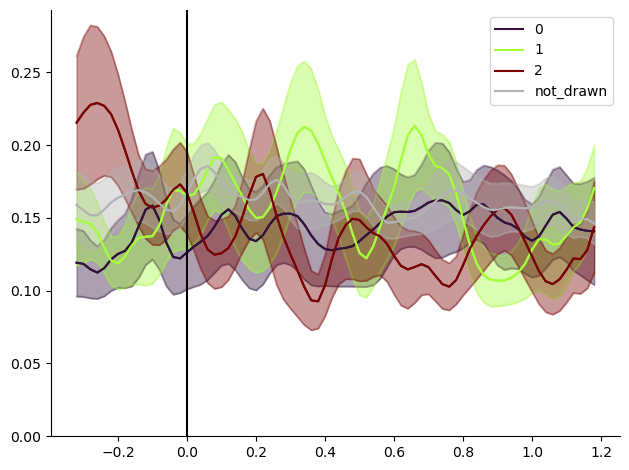

In [184]:
fig, ax = plt.subplots()
Dc.timeseries_plot_by_shape_drawn_order(pathis, ax, ymax=ymax)


In [176]:
pathis.X.shape

(6, 20, 76)

In [ ]:
PAprobs, probs_mat_all, times, labels

In [71]:
probs_mat_all.shape

(20, 76, 6)

##### Subtract baseline?

In [166]:
from neuralmonkey.scripts.analy_pig_decode_moment_syntaxTI import probs_timecourse_normalize
PAprobsNorm = probs_timecourse_normalize(PAprobs, "minus_not_visible_timecourse", map_tc_to_syntaxconcrete)

# 6b. Mult data (timecourse)

##### IGnore (older)

In [ ]:
# only keep good shapes
labels_keep = [lab for lab in Dc.MapLabelToIdx.keys() if not lab=="presamp"]
dfscores = dfscores[dfscores["decoder_class"].isin(labels_keep)].reset_index(drop=True)



In [ ]:
import seaborn as sns
# sns.catplot(data=dfscores, x="decoder_class", y="score", hue="decoder_class_was_drawn", kind="point")
sns.catplot(data=dfscores, x="decoder_class_was_drawn", y="score", kind="bar")
sns.catplot(data=dfscores, x="decoder_class_was_first_drawn", y="score", kind="bar")

In [ ]:
import seaborn as sns
# sns.catplot(data=dfscores, x="decoder_class", y="score", hue="decoder_class_was_drawn", kind="point")
sns.catplot(data=dfscores, x="decoder_class_idx_in_syntax", y="score", hue="decoder_class_was_drawn", kind="bar")
sns.catplot(data=dfscores, x="decoder_class_idx_in_syntax", y="score", hue="decoder_class_was_first_drawn", kind="bar")

In [ ]:
sns.catplot(data=dfscores, x="col", y="score", hue="decoder_class_was_drawn", alpha=0.2, jitter=True)


In [ ]:
##### Find characters that drawn diff ways, and plot all their trials --> variation in activaiton across trials?

In [ ]:
from pythonlib.tools.plottools import savefig
import os

zmax = 0.4

savedir = "/tmp/chars_same_stim_diff_beh"
os.makedirs(savedir, exist_ok=True)

### Cases where the same char is done different ways?
from pythonlib.tools.pandastools import grouping_append_and_return_inner_items_good
grpdict = grouping_append_and_return_inner_items_good(dflab, ["character"])

for grp, inds in grpdict.items():
    char = grp[0]
    if len(inds)>1:
        print(char, " -- ", len(inds))
        if len(set(dflab.iloc[inds]["shapes_drawn"].tolist()))>1:
        # if len(set(dflab.iloc[inds]["seqc_0_shapesemgrp"].tolist()))>1:
            pathis = pa.slice_by_dim_indices_wrapper("trials", inds)


            # HACKY - copying plotting code from above, to plot specific indices
            height = 5

            # For each trial, get score
            list_twind = [(0.1, 0.8)]
            scores, fig, axes = Dc.scalar_score_twinds_trials(list_twind, PA=pathis, tbin_dur=tbin_dur, return_fig=True, height=height, 
                                                              zmax=zmax,
                                                            score_ver=score_ver)

            # label each trial by which shapes were drawn.
            dflabthis = pathis.Xlabels["trials"]
            ax = axes.flatten()[0]
            nrows = len(dflabthis)
            mask_drawn = np.zeros(scores.shape).astype(bool)
            for ind in range(len(dflabthis)):

                shapes_drawn = dflabthis.iloc[ind]["shapes_drawn"]
                # shapes_drawn = [dflabthis.iloc[ind]["seqc_0_shapesemgrp"]]

                # convert drawn shapes to indices
                xinds_to_mark = [Dc.MapLabelToIdx[sh] if sh in Dc.MapLabelToIdx else -1 for sh in shapes_drawn]

                # Save which ones were drawn in a mask
                mask_drawn[ind, xinds_to_mark] = True

                xinds_to_mark = [Dc.MapLabelToIdx[sh] if sh in Dc.MapLabelToIdx else -1 for sh in shapes_drawn]
                # y = nrows - ind*np.ones(len(xinds_to_mark))
                xinds_to_mark = [x+0.5 for x in xinds_to_mark]
                y = ind*np.ones(len(xinds_to_mark))+0.5
                ax.plot(xinds_to_mark, y, "xg", alpha=1)

            ax = axes.flatten()[1]
            ax.imshow(mask_drawn)

            savefig(fig, f"{savedir}/{char}.pdf")
            
            plt.close("all")

# Testing the hypothesis (chars)

In [ ]:
# PRint trials with > 1 stroke
dflab = PA.Xlabels["trials"]
dflab[dflab["FEAT_num_strokes_task"]>1].index.tolist()

In [ ]:
# Plot a multi-stroke trial 
# NOTE: you can see here switching between representations of shapes

trial = 295

for i in [0,1,2,3]:
    print("stroke", i, " -- ", dflab.iloc[trial][f"seqc_{i}_shape"])

tbin_dur=0.15
tbin_slide=0.01
Dc.plot_single_trial(trial, PA=PA, tbin_dur=tbin_dur, tbin_slide=tbin_slide)


#### plot after sort labels (in progress)


In [ ]:
# NOTE: this is written for a very specific expeirmetn (Novel vs. orig prims)_.

In [ ]:
def F(x):
    if "novelprim" in x:
        return f"2{x}"
    elif "presamp" in x:
        return f"3{x}"
    else:
        return f"1{x}"


In [ ]:
labs_rows = [x[0] for x in grpdict.keys()]
labs_for_sorting = [F(x) for x in labs_rows]
inds = np.argsort(labs_for_sorting)
print(labs_for_sorting)
res_sorted = resthis[inds, :, :]
labs_rows_sorted = [labs_rows[i] for i in inds]

labs_cols = mlb.classes_
labs_for_sorting = [F(x) for x in labs_cols]
print(labs_for_sorting)
inds = np.argsort(labs_for_sorting)
res_sorted = res_sorted[:, inds, :]
labs_cols_sorted = [labs_cols[i] for i in inds]

from pythonlib.tools.snstools import heatmap_mat

ncols = 3
nrows = int(np.ceil(len(list_twind)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*7, nrows*5))

for ax, ind_twind in zip(axes.flatten(), range(len(list_twind))):
    if True:
        heatmap_mat(res_sorted[:, :, ind_twind], ax, False, zlims=(0, 0.3))    
        ax.set_xlabel("decoded class label")
        ax.set_ylabel("trial label")
        ax.set_title(f"twind: {list_twind[ind_twind]}")
    else:
        res_vec = np.mean(res_sorted[:, :, ind_twind], axis=0)
        xlab = [f"{i}-{x[:1]}" for i, x in enumerate(labs_cols_sorted)]
        ax.plot(xlab, res_vec, "ok")

        from pythonlib.tools.plottools import rotate_x_labels
        rotate_x_labels(ax)
        ax.set_xlabel("decoded class label")
        ax.set_ylabel("trial label")
        ax.set_title(f"twind: {list_twind[ind_twind]}")
        ax.set_ylim([0, 0.1])

        

# Older methods

### Extract single trial results

In [ ]:

# PARAMS
var_decode = "seqc_0_shape"
bregion = "PMv"
twind = (-0.4, 0.6)

In [ ]:

a = DFRES["var_decode"]==var_decode
b = DFRES["bregion"]==bregion
c = DFRES["twind"]==twind
dfthis = DFRES[a & b & c]

times = dfthis["time"]
import numpy as np
labels_predicted = np.stack(dfthis["labels_predicted"]).T # (ntrials, ntimes)
labels_test = np.stack(dfthis["labels_test"]).T
conf_scores = np.transpose(np.stack(dfthis["conf_scores"]), [1,0,2]) # (ntrials, ntimes, nclasses)

# score each time bin as correct or incorrect
labels_correct = (labels_predicted == labels_test).astype(int)


In [ ]:
# For each trial, what was its label
assert np.all(np.diff(labels_test, axis=1))==0, "otherwise cant do next step."
labels_each_trial = labels_test[:,0]
labels_orig = PA_test.Xlabels["trials"][var_decode].tolist()
assert len(labels_orig)==len(labels_each_trial)

map_labint_to_trials = {}
map_labint_to_laborig = {}
labels_unique = np.unique(labels_each_trial)
for lab in labels_unique:
    inds_this_label = np.argwhere(labels_each_trial == lab).squeeze() # the indices which ahve this label as the CORRECT
    map_labint_to_trials[lab] = inds_this_label

    # Map it back to original label
    lab_orig = PA_test.Xlabels["trials"][var_decode][inds_this_label].unique()
    assert len(lab_orig)==1
    map_labint_to_laborig[lab] = lab_orig[0]

map_trial_to_labint = {i:labint for i, labint in enumerate(labels_each_trial)}
print(map_labint_to_laborig)    
map_laborig_to_labint = {}
for labint, laborig in map_labint_to_laborig.items():
    assert laborig not in map_laborig_to_labint
    map_laborig_to_labint[laborig] = labint

import matplotlib.pyplot as plt
from pythonlib.tools.plottools import makeColors
pcols = makeColors(len(map_labint_to_laborig))
map_trial_to_seq = {}
map_trial_to_seq_ints = {}
for i, seq in enumerate(PA_test.Xlabels["trials"].loc[:, ["seqc_0_shape", "seqc_1_shape"]].values.tolist()):
    map_trial_to_seq[i] = (tuple(seq))
    map_trial_to_seq_ints[i] = [map_laborig_to_labint[s] if s in map_laborig_to_labint else s for s in seq]


In [ ]:
# Pick n random trials
import random
n=  9
trials_all = list(range(len(map_trial_to_labint)))
trials = random.sample(trials_all, n)
ncols = 3
nrows = int(np.ceil(len(trials)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3), sharex=True, sharey=True)

for tr, ax in zip(trials, axes.flatten()):
    
    # ax = axes.flatten()[0]
    lab_pred = labels_predicted[tr,:]
    # lab_corr = labels_correct[trial,:]
    # lab_test = labels_test[trial,:]
    # ax.plot(times, lab_pred, "-ok"),
    # ax.plot(times, lab_test, "-r")
    
    # for each class, plot its time series
    for labint in map_labint_to_laborig:
        cs_this_lab = conf_scores[tr, :, labint].squeeze()
        
        ax.plot(times, cs_this_lab, label=labint, color=pcols[labint])
        # ax.plot(times[lab_pred==labint], cs_this_lab[lab_pred==labint], "-", color=pcols[labint], linewidth=4)
        ax.plot(times[lab_pred==labint], cs_this_lab[lab_pred==labint], "s", color=pcols[labint])
    
    ax.axvline(0, color="k", alpha=0.5)
    ax.set_title(f"{var_decode}={map_trial_to_labint[tr]}", color=pcols[map_trial_to_labint[tr]])
    ax.set_xlabel(f"seq: {map_trial_to_seq_ints[tr]}")
    ax.legend()
        

In [ ]:
# For each class label, collect all trials for which that is the correct label, and overlap

labels_unique = np.unique(labels_each_trial)
ncols = 3
nrows = int(np.ceil(len(labels_unique)/ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*4))

for lab, ax in zip(labels_unique, axes.flatten()):
    inds_this_label = np.argwhere(labels_each_trial == lab).squeeze() # the indices which ahve this label as the CORRECT 
    ax.plot(times, labels_predicted[inds_this_label, :].T, "-ok", alpha=0.05)
    ax.set_title(lab)
    
    

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

ax = axes.flatten()[0]
ax.plot(times, labels_correct.T, "xk", alpha=0.003);

In [ ]:
##### Plot the results, comparing score across methods!!
%matplotlib inline
import seaborn as sns
fig = sns.relplot(data=DFRES, x="time", y="score", hue="bregion", col="var_decode",  kind="line")


In [ ]:
##### Plot the results, comparing score across methods!!
%matplotlib inline
import seaborn as sns
fig = sns.relplot(data=DFRES, x="time", y="score", hue="bregion", col="var_decode",  kind="line")


In [ ]:
from neuralmonkey.analyses.decode_good import decodewrapouterloop_categorical_cross_time

In [ ]:
# L